# บทที่ 2 - ชุดข้อมูลมหัศจรรย์และถิ่นที่อยู่

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ai-builders/curriculum/blob/main/notebooks/02_fantastic_datasets.ipynb)

ในปัจจุบันชุดข้อมูลที่มีพร้อมทั้งปริมาณและคุณภาพเป็นส่วนสำคัญในการสร้าง ML models ในบทเรียนนี้เราจะเรียนรู้วิธีการหาข้อมูลมาเทรนโมเดลของเราทั้งจากชุดข้อมูล open data, web scraping, หรือสร้างขึ้นมาเองจากโมเดลและโค้ด open source ทั้งนี้การหาข้อมูลมาเทรนโมเดลจากแหล่งข้อมูลสาธารณะที่กล่าวมานั้นเราต้องให้ความสำคัญเรื่องลิขสิทธิ์และจริยธรรม (แม้แต่โมเดลเองก็สร้างข้อมูลที่ผิดลิขสิทธิ์-จริยธรรมได้; เรียนเพิ่มเติมในบทที่ 7)

## ติดตั้ง Package ที่ต้องใช้งาน

In [1]:
#fastai
!pip install -q fastbook==0.0.29

#ctgan
!pip install -q sdv==0.18.0

#review generation
!pip install -q transformers==4.39.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 961.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━

## Data-centric AI เมื่อปริมาณ-คุณภาพข้อมูลสำคัญเท่ากับหรือมากกว่าคุณภาพโมเดล

ในปัจจุบันเรามีสถาปัตยกรรมประสิทธิภาพสูงมากมายให้เลือกใช้ทำ ML models (images - ResNet/EfficientNet, texts - BERT family, tabular data - gradient boosted trees) ปริมาณและคุณภาพของชุดข้อมูลจึงเริ่มมีความสำคัญมากยิ่งขึ้นในการทำให้ประสิทธิภาพของโมเดลของเราดีขึ้น

แนวคิด Data-centric AI ถูกทำให้เป็นที่รู้จักโดย [Andrew Ng และ Landing AI](https://landing.ai/data-centric-ai/) กล่าวคือแทนที่เราจะพยามสร้างโมเดลที่มีประสิทธิภาพยิ่งขึ้น (และโดยส่วนใหญ่แล้วซับซ้อน ใหญ่ และใช้งานยากขึ้น)ให้เรามาใช้เวลาในการ 1) เพิ่มปริมาณข้อมูลและ 2) พัฒนาคุณภาพข้อมูลแทน

ยกตัวอย่าง Data-centric AI ในการตัดคำภาษาไทยด้วยโมเดลโดย [@kornwtp](https://medium.com/@kornwtp/) ในบทความ [Data-Centric ML for Thai Word Segmentation](https://medium.com/@kornwtp/data-centric-for-thai-word-segmentation-e31a79db650d) พวกเขาทำการทดลองตัดคำภาษาไทยด้วยชุดข้อมูล [VISTEC-TP-TH-2021](https://github.com/mrpeerat/OSKut/tree/main/VISTEC-TP-TH-2021) (ประมาณ 5 หมื่นประโยค) ด้วยโมเดล [deepcut](https://github.com/rkcosmos/deepcut) อย่างที่เห็นในตารางรายงานผล การเพิ่มขนาดโมเดลถึง 1 เท่าตัวมีผลให้ความแม่นยำเพิ่มขึ้นเพียงแค่ 1.37% กลับกันการเพิ่มข้อมูลเพียงแค่ 1,500 ตัวอย่างทำให้ความแม่นยำเพิ่มขึ้นถึง 4.90% ยิ่งถ้าข้อมูลที่เพิ่มถูกทำความสะอาดแล้วจะทำให้เพิ่มขึ้นถึง 7.48% (แน่นอนว่าถ้ายิ่งโมเดลใหญ่และข้อมูลเยอะก็ยิ่งดี)

<img src=https://miro.medium.com/max/1400/0*J2vA5iRnIMfuDDAc width="500px">

## ชุดข้อมูลสาธารณะ - Open Data and Open Source

ชุดข้อมูล open data และโค้ด open source ถือเป็นสาธารณูปโภคขั้นพื้นฐานของการทำ ML และโชคดีที่น่าจะเป็นสาธารณูปโภคขั้นพื้นฐานไม่กี่อย่างที่เราในฐานะบุคคลสามารถช่วยกันสร้างได้ด้วยการนำไปใช้-เผยแพร่ชุดข้อมูลและโค้ด

โดยทั่วไปแล้ว ชุดข้อมูลจะถูกเผยแพร่ภายใต้ [Creative Commons Licenses](https://creativecommons.org/) ที่นิยมดังต่อไปนี้

* `CC` - Creative Commons
* `BY` (Attribution) - ใช้ทำซ้ำ แจกจ่าย ดัดแปลงได้ แต่ต้องอ้างอิงเจ้าของผลงาน
* `SA` (ShareAlike) - ใช้ทำซ้ำ แจกจ่าย ดัดแปลงได้ แต่ต้องคง License เดิมไว้
* `NC` (NonCommercial) - ใช้ทำซ้ำ แจกจ่าย ดัดแปลงได้ แต่ห้ามใช้เพื่อการค้า
* `ND` (NoDerivatives) - ใช้ทำซ้ำ แจกจ่ายได้ แต่ห้ามดัดแปลง

เราแนะนำให้คุณแบ่งปันผลงานเป็น `CC-BY-SA` เพื่อให้ชุมชนนักพัฒนาสามารถนำไปต่อยอดได้ เหมือนเช่นที่เรานำงานของชุมชนมาต่อยอด

คุณสามารถเลือก License ที่คุณต้องการได้[ที่นี่](https://creativecommons.org/choose/)

### แหล่งค้นหาชุดข้อมูล

ต่อไปนี้คือแหล่งข้อมูลหลักๆที่คุณสามารถพบเจอชุดข้อมูล open data

แหล่งค้นหาชุดข้อมูลทั่วไป
* [Kaggle](https://www.kaggle.com/datasets)
* [Google Dataset Search](https://datasetsearch.research.google.com/)
* [Papers with Code](https://paperswithcode.com/datasets)
* [Tensorflow Datasets](https://www.tensorflow.org/datasets)

แหล่งค้นหาชุดข้อมูล Images
* [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html)
* [torchvision.datasets](https://pytorch.org/vision/stable/datasets.html)

แหล่งค้นหาชุดข้อมูล NLP และ Speech
* [Hugging Face Datasets](https://huggingface.co/datasets)
* [torchtext.datasets](https://pytorch.org/text/stable/datasets.html)
* [torchaudio.datasets](https://pytorch.org/audio/stable/datasets.html)
* [NLP for Thai](https://nlpforthai.com/)


แหล่งค้นหาชุดข้อมูล Tabular Data
* [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

### ชื่อ Task ไว้ใช้ค้นหาชุดข้อมูล

อีกแนวทางการค้นหาข้อมูลคือค้นหา "[ชื่อ task] datasets" ใน search engine

Images
* Image classification; จำแนกรูปภาพ
* Object detection; จับวัตถุในรูปภาพ
* Image segmentation; จำแนก pixel ในรูปภาพ
* Image information retrieval (search); ค้นหารูปภาพด้วยรูปภาพ
* Image captioning; ใส่คำบรรยายให้รูปภาพ
* Visual question answering; ตอบคำถามจากรูปภาพ
* Image generation; สร้างรูปภาพ
* Image reconstruction; ซ่อมแซมรูปภาพ (รูปเก่า, เซนเซอร์ ฯลฯ)
* Style transfer; เปลี่ยนสไตล์ของรูปภาพ

NLP
* Sequence classification; จำแนกข้อความ
* Token classification; จำแนกหน่วยคำในข้อความ
* Extractive question answering; ตอบคำถามจากบทความ
* Machine translation; แปลภาษา
* Summarization; ย่อความ
* Paraphrasing; ถอดความ
* Optical character recognition; เปลี่ยนตัวอักษรในภาพเป็นข้อความ
* Text information retrieval (search); ค้นหาข้อความด้วยข้อความ
* Text generation; สร้างข้อความ
* Dialogue; สร้างบทสนทนาตอบโต้

Speech
* Speech classification; จำแนกเสียง
* Automatic speech recognition; ถอดเสียงเป็นข้อความ
* Speech synthesis; สร้างเสียง (จากข้อความ)
* Speaker recognition; จำแนกผู้พูด

Tabular Data
* Multi-class classification; จำแนกตัวอย่าง (1 ตัวอย่าง = 1 ประเภท)
* Multi-label classification; จำแนกตัวอย่าง (1 ตัวอย่าง = มากกว่า 1 ประเภท)
* Regression; ทำนายจำนวนจริง
* Time series forecasting; ทำนายตัวเลขในเชิงเวลา
* Recommendation; แนะนำสิ่งของ

## หารูปภาพจาก DuckDuckGo Image Search API

เทคนิคแนะนำโดย [fastai v4 part1 lesson 2](https://github.com/fastai/fastbook/blob/master/02_production.ipynb) ผู้ที่สนใจสามารถไปติดตามบทเรียนต้นทางได้ที่ [course.fast.ai](https://course.fast.ai/)

ก่อนอื่นคุณต้อง[สมัครบัญชีฟรีของ Microsoft Azure](https://azure.microsoft.com/en-us/services/cognitive-services/bing-web-search-api/) เพื่อให้ได้ `AZURE_SEARCH_KEY` มาแล้วแทนที่ `XXX` ด้านล่าง

In [34]:
key = os.environ.get('AZURE_SEARCH_KEY', 'XXX')

In [41]:
#save ไว้ที่ไหน
path = Path('images')
#เอารูปอะไรบ้าง (labels)
labels = ['chocolate chip cookies','raisin cookies']
#เอา label ละกี่รูป
MAX_N = 100

if not path.exists():
    path.mkdir()
    for l in tqdm(labels):
        dest = (path/l)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, l, max_images = MAX_N)
        imgs = results.attrgot('contentUrl')
        download_images(dest, urls=imgs)

  0%|          | 0/2 [00:00<?, ?it/s]

['https://iambaker.net/wp-content/uploads/2010/09/ccc.jpg', 'https://freshaprilflours.com/wp-content/uploads/2015/02/classic-ccc-WM-2.jpg', 'https://www.inspiredtaste.net/wp-content/uploads/2016/08/Homemade-Chocolate-Chip-Cookies-Recipe-1200.jpg', 'https://thedomesticrebel.com/wp-content/uploads/2021/01/DSC_0578A-scaled.jpg', 'https://owlbbaking.com/wp-content/uploads/2018/02/DSC04473-min-scaled.jpg', 'https://i0.wp.com/taniabakes.com/wp-content/uploads/2013/03/121.jpg', 'https://handletheheat.com/wp-content/uploads/2018/02/BAKERY-STYLE-CHOCOLATE-CHIP-COOKIES-6.jpg', 'https://i0.wp.com/www.livewellbakeoften.com/wp-content/uploads/2017/02/Chocolate-Chip-Cookies-7.jpg?resize=1360,2040', 'https://www.janespatisserie.com/wp-content/uploads/2016/02/IMG_7317.jpg', 'https://www.modernhoney.com/wp-content/uploads/2017/12/Charminas-Chocolate-Chip-Cookies-1.jpg', 'http://www.spoonforkbacon.com/wordpress/wp-content/uploads/2014/01/chocolate-chip-cookies-recipe.jpg', 'https://i2.wp.com/www.livewel

In [42]:
#เช็คว่าได้รูปอะไรบ้าง
fns = get_image_files(path)
fns

(#194) [Path('images/chocolate chip cookies/ca5718e9-2b0f-4ee7-93cf-f954908f0ff0.jpg'),Path('images/chocolate chip cookies/22d61bbf-7891-4404-95c8-b845690f2d53.jpg'),Path('images/chocolate chip cookies/8e2f3c0e-292c-43a3-8abe-2ac292143f56.jpg'),Path('images/chocolate chip cookies/b4fa7fb6-a9a8-4b62-9702-da18f18c892f.jpg'),Path('images/chocolate chip cookies/a661601c-3f59-4e93-b9e4-27e8f275dd6a.jpg'),Path('images/chocolate chip cookies/f663df6b-e313-4677-963d-8bab281f6976.jpg'),Path('images/chocolate chip cookies/19ce4087-ccdc-491d-a007-67e175189226.jpg'),Path('images/chocolate chip cookies/570c6265-bb28-40a6-ac4f-7937038af675.jpg'),Path('images/chocolate chip cookies/ea8f856e-1621-42af-a82c-f61e593ce6ec.jpg'),Path('images/chocolate chip cookies/96a57956-d968-496f-8ab1-042bfbe67a90.jpg')...]

In [43]:
#ดูว่าหารูปไหนไม่เจอบ้าง
failed = verify_images(fns)
failed

(#1) [Path('images/raisin cookies/bccc1afe-9fb9-4761-8305-3db2dab6838e.jpg')]

In [44]:
#นำรูปที่หาไม่เจอออก
failed.map(Path.unlink)

(#1) [None]

## Web Scraping ดึงข้อมูลจากเว็บไซต์สาธารณะ

Web Scraping คือการเขียนโปรแกรมดึงข้อมูลจากเว็บไซต์สาธารณะ ข้อควรระวังคือแม้โดยความเป็นจริงแล้วข้อมูลเหล่านั้นจะถูกเปิดเผยให้ใครเข้าไปดูก็ได้ แต่ไม่ได้หมายความว่าเจ้าของเว็บไซต์จะอยากให้เราดึงข้อมูลจำนวนมากจากเว็บไซต์ของพวกเขา ไม่ว่าจะด้วยเหตุผลด้านลิขสิทธิ์การใช้งานหรือการเพิ่มภาระให้เซิร์ฟเวอร์ของเว็บไซต์นั้นๆ ยกตัวอย่างเช่น Facebook หรือ Twitter ที่ข้อตกลงการใช้งานของพวกเขาไม่อนุญาตให้เราดึงข้อมูลด้วย Web Scraping แต่อนุญาตให้ดึงข้อมูลผ่าน API อย่างเป็นทางการแทน

หากไม่แน่ใจในนโยบายการใช้งาน ทางที่ดีควรติดต่อขออนุญาตจากเจ้าของเว็บไซต์ก่อน นี่คือตัวอย่างที่ทางทีมงานติดต่อไปยัง [soccersuck.com](https://www.soccersuck.com) เพื่อขออนุญาตนำมาใช้สอน

> ทีมงาน AI Builders: สวัสดีครับ ผมทำโครงการสอนเด็กมัธยมทำ AI ชื่อ AI Builders (https://www.facebook.com/aibuildersx) อยู่ครับ พอดีครั้งนี้เราจะจัดสอนช่วงหลังสงกรานต์ และมีหัวข้อหนึ่งคือ web scraping หรือการเขียนโปรแกรมดึงเนื้อหาจากเว็บไซต์ อยากขออนุญาตใช้ https://www.soccersuck.com/boards/oldnews เป็นตัวอย่างในการฝึกสอนครับ โดนสอนให้น้องๆเขียนโปรแกรมดึงพาดหัวข่าว, url ข่าว, และเนื้อข่าวเฉพาะกระทู้ที่อยู่ใน old news 3 หน้าเท่านั้น โปรแกรมทั้งหมดใช้เพื่อสาธิตในการศึกษาครับ นักเรียนมีจำนวน 50 คน คิดว่าไม่มีปัญหา traffic แม้จะกดรันโค้ดพร้อมกันทุกคนครับ

> Soccersuck: ได้ครับไม่มีปัญหา



### Static Web

สมมุติว่าเราอยากทำโมเดล "เขียนพาดหัวข่าวฟุตบอลจากเนื้อข่าวในเว็บ [soccersuck.com](https://www.soccersuck.com/boards/oldnews)"

In [45]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#### ดึง HTML มาเปลี่ยนเป็น Soup

In [46]:
#package สำหรับจัดการ html เรียกว่า BeautifulSoup
def get_soup(url):
    with requests.get(url) as r:
        soup = BeautifulSoup(r.text, features='html.parser')
    return soup

In [47]:
#ดึงข้อมูล html จากเว็บไซต์มาเปลี่ยนเป็น soup
url = f'https://www.soccersuck.com/boards/oldnews/1/'
soup = get_soup(url)
soup

﻿<!DOCTYPE HTML>

<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/> <title>
		#### ได้รู้ความจริง ได้ยิ่งกว่าฟุตบอล อ่าน soccersuck.com####	</title>
<link href="/img/web/ss_logo_f_16.ico" rel="shortcut icon"/>
<meta content="app-id=1042191005" name="apple-itunes-app"/>
<meta content="app-id=com.soccersuck.devtab.com.soccersuck" name="google-play-app"/>
<link href="https://www.soccersuck.com/css/jquery.smartbanner.css" media="screen" rel="stylesheet" type="text/css"/>
<meta content="ข่าวฟุตบอล ข่าวบอล นักฟุตบอล ผลการแข่งขัน ข่าวลือ ข่าวการย้ายทีม บอลอังกฤษ บอลเยอรมัน บอลอิตาลี บอลสเปน ฟุตบอล บอบทีมชาติ บอลไทย บอลทีมชติไทย เว็บบอร์ด วาไรตี้ ภาพเซ็กซี่ 18+ โปรแกรมการแข่งขัน โปรแกรมถ่ายทอดสด" name="description">
<meta content="ข่าวฟุตบอล,ข่าวบอล,ผลการแข่งขัน,นักฟุตบอล,บอลอังกฤษ,บอลเยอรมัน,บอลอิตาลี,บอลสเปน,ฟุตบอล,ข่าวการย้ายทีม,

#### หา Tag ต่างๆใน Soup

In [48]:
#หา tag ชื่อ div ที่มี class oldnew_p_tr
#เราสามาร?ถหาโดย id ได้ด้วย แค่เปลี่ยนเป็น id='id_you_are_looking_for'
soup.find('div', class_='oldnew_p_tr')

<div class="oldnew_p_tr" style="background: #C4E29B;">
<img alt="" src="https://www.soccersuck.com/images/eng.gif" style="margin: 0px 5px -1px 2px;width: 20px;"/> <a href="https://www.soccersuck.com/boards/topic/2425208" target="_blank">
                    หงส์โล่ง! 'ร็อบโบ้' เจ็บไม่หนัก แต่ไม่ชัวร์ฟิตทันบ...                    </a>
</div>

In [49]:
soup.find('div', class_='oldnew_p_tr').find('a')

<a href="https://www.soccersuck.com/boards/topic/2425208" target="_blank">
                    หงส์โล่ง! 'ร็อบโบ้' เจ็บไม่หนัก แต่ไม่ชัวร์ฟิตทันบ...                    </a>

In [50]:
#เอา text จาก tag <a>
soup.find('div', class_='oldnew_p_tr').find('a').text.strip(),\
#เอา href จาก tag <a>
soup.find('div', class_='oldnew_p_tr').find('a').get('href')

'https://www.soccersuck.com/boards/topic/2425208'

In [51]:
df = pd.DataFrame([
{'headline_abridged': i.text.strip(),
 'url': i.find('a').get('href')} \
 #find() จะหาแค่ tag แรกที่เจอ แต่ find_all() จะหาทุก tag ที่ตรงเงื่อนไข
 for i in soup.find_all('div', class_='oldnew_p_tr')]).head(10)
df

,headline_abridged,url
0,หงส์โล่ง! 'ร็อบโบ้' เจ็บไม่หนัก แต่ไม่ชัวร์ฟิตทันบ...,https://www.soccersuck.com/boards/topic/2425208
1,พอชไม่ปลื้ม สิงโตโหมใช้งาน 'ชิลเวลล์' จนเดี้ยง,https://www.soccersuck.com/boards/topic/2425193
2,สาลิกาช็อค! FA แจ้งข้อหา 'โตนาลี' ผิดกฎพนัน 50 ครั...,https://www.soccersuck.com/boards/topic/2425182
3,‘ศุภวุฒิ’ แฮตทริก! ฟุตซอลไทย ถอนแค้น ออสซี่ 9-2 คว้าแชมป์ NS...,https://www.soccersuck.com/boards/topic/2425177
4,'อัลเวส' จัดปาร์ตี้ครอบครัวยันตี 5,https://www.soccersuck.com/boards/topic/2425105
5,งูปรับแผนต่อสัญญา 'อินซากี้' 2 ปี,https://www.soccersuck.com/boards/topic/2425100
6,'พี่ฟู' รับปีแรกกับผีเลวร้ายสุดในอาชีพ,https://www.soccersuck.com/boards/topic/2425090
7,แข้งคนโปรด! ตอร์เรสยก 'บังโม' ขึ้นแท่นตำนานหงส์,https://www.soccersuck.com/boards/topic/2425082
8,เปิดกว้างเสมอ! เซาธ์เกตชี้อยู่ที่ 'ไวท์' คัมแบ็คสิ...,https://www.soccersuck.com/boards/topic/2425079
9,เอดูร่างลิสต์ 10 หอกปืนสนทาบซัมเมอร์,https://www.soccersuck.com/boards/topic/2425077


#### ดึงข้อมูลจาก url ย่อย

In [52]:
#จากหน้า list　ข่าว พาดหัวจะแสดงได้ไม่เต็ม
df.loc[0]

headline_abridged    หงส์โล่ง! 'ร็อบโบ้' เจ็บไม่หนัก แต่ไม่ชัวร์ฟิตทันบ...
url                        https://www.soccersuck.com/boards/topic/2425208
Name: 0, dtype: object

In [53]:
#เราสามารถเข้าไปใน url ของข่าวแต่ละข่าวเพื่อไปเอาพาดหัวแบบเต็มและเนื้อข่าวได้
soup = get_soup(df.loc[0,'url'])
soup.find('div', class_='post_head').text.strip(),\
soup.find('div', class_='post_desc').text.strip()

("หงส์โล่ง! 'ร็อบโบ้' เจ็บไม่หนัก แต่ไม่ชัวร์ฟิตทันบู๊ไบรท์ตัน",
 'แฟนบอล "หงส์แดง" ลิเวอร์พูล รับข่าวดี แอนดี้ โรเบิร์ตสัน แบ็กซ้ายตัวเก่ง อาการเจ็บไม่รุนแรงอย่างที่กังวลในตอนแรก แต่ยังไม่ขัวร์ว่าจะกลับมาฟิตทันเจอไบรท์ตัน วันอาทิตย์หรือไม่\n\nกองหลังวัย 30 ปี เจ็บข้อเท้าจากจังหวะปะทะหนักกับ ไทร ฮูม แบ็คขวาซันเดอร์แลนด์ ก่อนถูกเปลี่ยนตัวออกในนาทีที่ 37 ในเกมสกอตแลนด์แพ้คาบ้านต่อไอร์แลนด์เหนือ 1-0\n\nโดยเขากลับมาแอนฟิลด์และถูกส่งตัวตรวจเช็คอาการเจ็บให้แน่ชัดอีกครั้งเมื่อวันพุธ ล่าสุดดูเหมือนว่า อาการเจ็บดังกล่าวไม่ได้รุนแรงอย่างที่กังวลในตอนแรก โรเบิร์ตสัน จะพักไม่นาน\n\nอย่างไรก็ตาม ยังไม่ชัดเจนว่าเขาจะเรียกความฟิตได้ทันเจอไบรท์ตัน สุดสัปดาห์นี้หรือไม่ กับสถานการณ์ที่ทีมหงส์เตรียมลงสนาม 3 นัดใน 8 วัน\n\nปัจจุบัน ลิเวอร์พูล ตามหลังจ่าฝูงพรีเมียร์ลีกอย่าง อาร์เซนอล ด้วยผลต่างประตูได้เสียที่น้อยกว่าเท่านั้น โดยเหลืออีกอีกเพียง 10 นัดก่อนปิดฤดูกาล')

In [54]:
#เขียนฟังชั่นเพื่อเข้าไปดึงข้อมูลจากหน้าข่าว
def get_post_head_desc(url):
    soup = get_soup(url)
    return {'post_head': soup.find('div', class_='post_head').text.strip(),
            'post_desc': soup.find('div', class_='post_desc').text.strip()}

In [55]:
#วนลูป (map) เพื่อไปดึงพาดหัวแบบเต็มและเนื้อข่าว
df2 = pd.DataFrame(df.url.map(get_post_head_desc).tolist())
df = pd.concat([df,df2],1)
df

<ipython-input-55-3d26f9c8868d>:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([df,df2],1)


,headline_abridged,url,post_head,post_desc
0,หงส์โล่ง! 'ร็อบโบ้' เจ็บไม่หนัก แต่ไม่ชัวร์ฟิตทันบ...,https://www.soccersuck.com/boards/topic/2425208,หงส์โล่ง! 'ร็อบโบ้' เจ็บไม่หนัก แต่ไม่ชัวร์ฟิตทันบู๊ไบรท์ตัน,"แฟนบอล ""หงส์แดง"" ลิเวอร์พูล รับข่าวดี แอนดี้ โรเบิร์ตสัน แบ็กซ้ายตัวเก่ง อาการเจ็บไม่รุนแรงอย่างที่กังวลในตอนแรก แต่ยังไม่ขัวร์ว่าจะกลับมาฟิตทันเจอไบรท์ตัน วันอาทิตย์หรือไม่\n\nกองหลังวัย 30 ปี เจ็บข้อเท้าจากจังหวะปะทะหนักกับ ไทร ฮูม แบ็คขวาซันเดอร์แลนด์ ก่อนถูกเปลี่ยนตัวออกในนาทีที่ 37 ในเกมสกอตแลนด์แพ้คาบ้านต่อไอร์แลนด์เหนือ 1-0\n\nโดยเขากลับมาแอนฟิลด์และถูกส่งตัวตรวจเช็คอาการเจ็บให้แน่ชัดอีกครั้งเมื่อวันพุธ ล่าสุดดูเหมือนว่า อาการเจ็บดังกล่าวไม่ได้รุนแรงอย่างที่กังวลในตอนแรก โรเบิร์ตสัน จะพักไม่นาน\n\nอย่างไรก็ตาม ยังไม่ชัดเจนว่าเขาจะเรียกความฟิตได้ทันเจอไบรท์ตัน สุดสัปดาห์นี้หรือไม่ กั..."
1,พอชไม่ปลื้ม สิงโตโหมใช้งาน 'ชิลเวลล์' จนเดี้ยง,https://www.soccersuck.com/boards/topic/2425193,พอชไม่ปลื้ม สิงโตโหมใช้งาน 'ชิลเวลล์' จนเดี้ยง,"เมาริซิโอ ปอเชตติโน่ บอสใหญ่ ""สิงห์บลูส์"" เชลซี ไม่แฮปปี้ที่ ""สิงโตคำราม"" อังกฤษ ใช้งาน เบน ชิลเวลล์ อย่างหนักหน่วง ส่งเป็นตัวจริงทั้ง 2 นัดตามโปรแกรมอุ่นเครื่องตลอดทั้งสัปดาห์ที่ผ่านมา ส่งผลให้เจ้าตัวมีปัญหาบาดเจ็บ อาจฟิตไม่ทันช่วยต้นสังกัดวันเสาร์นี้\n\n\nชิลเวลล์ ลงเล่นเต็ม 90 นาทีในเกมเสมอเบลเยียม 2-2 เมื่อกลางสัปดาห์ เป็นการออกสตาร์ตเป็น 11 ตัวจริงต่อเนื่องจากนัดแพ้บราซิล 1-0 เมื่อสุดสัปดาห์ ซึ่งเกมนั้น เขาได้เล่นไป 67 นาที\n\nปอเชตติโน่ รู้สึกไม่แฮปปี้อย่างมากที่อังกฤษโหมใช้งานลูกทีมของเขาอย่างหนักหน่วงขนาดนั้น ทั้งที่ ชิลเวลล์ ไม่ได้อยู่ในสภาพที่ฟิตสมบูรณ์ เพิ่งจะได้เล่นพรีเมียร์ลี..."
2,สาลิกาช็อค! FA แจ้งข้อหา 'โตนาลี' ผิดกฎพนัน 50 ครั...,https://www.soccersuck.com/boards/topic/2425182,สาลิกาช็อค! FA แจ้งข้อหา 'โตนาลี' ผิดกฎพนัน 50 ครั้ง,"สมาคมฟุตบอลอังกฤษ (เอฟเอ) ตั้งข้อหา ซานโดร โตนาลี่ กองกลางของนิวคาสเซิ่ล ยูไนเต็ด กระทำผิดละเมิดกฎการพนันกว่า 50 ครั้ง\n\nโตนาลี่ โดนแบนยาว 10 เดือนจากการตัดสินของสหพันธ์ฟุตบอลอิตาลี (เอฟไอจีซี) เมื่อต้นฤดูกาลที่ผ่านมา โดยเป็นการทำผิดระหว่างค้าแข้งกับเอซี มิลาน ในอิตาลี\n\nล่าสุด เอฟเอ กล่าวหาว่าห้องเครื่องทีมชาติอิตาลี ลงขันพนันเกมการแข่งขันระหว่าง 12 ส.ค. - 12 ต.ค.2023 กว่า 50 ครั้ง\n\nตอนนี้ โตนาลี มีเวลาจนถึงวันที่ 5 เม.ย. ในการตอบสนองข้อกล่าวหาดังกล่าว\n\nด้าน ""สาลิกา"" แถลงว่า ""นิวคาสเซิ่ล ยูไนเต็ด รับทราบข้อกล่าวหาการกระทำผิดกฏการพนันของเอฟเอของซานโดร โตนาลีแล้ว""\n\n""ซานโดร ยังคงให้ค..."
3,‘ศุภวุฒิ’ แฮตทริก! ฟุตซอลไทย ถอนแค้น ออสซี่ 9-2 คว้าแชมป์ NS...,https://www.soccersuck.com/boards/topic/2425177,‘ศุภวุฒิ’ แฮตทริก! ฟุตซอลไทย ถอนแค้น ออสซี่ 9-2 คว้าแชมป์ NSDF,"ฟุตซอลไทยเล่นสะใจกองเชียร์ ถอนแค้น ออสเตรเลีย เหี้ยมโหด 9-2 ""ศุภวุฒิ เถื่อนกลาง"" กระหน่ำแฮตทริกปิดท้ายยิ่งใหญ่ คว้าแชมป์ NSDF FUTSAL CHAMPIONSHIP THAILAND 2024\n\nศึกฟุตซอลสี่เส้า NSDF FUTSAL CHAMPIONSHIP THAILAND 2024 ที่ยิมเนเซียม 4,000 ที่นั่ง สนามกีฬา อบจ.นนทบุรี เมื่อวันพฤหัสบดี 28 มี.ค.67 วันสุดท้าย รอบชิงชนะเลิศ ""ฟุตซอลช้างศึก"" ทีมชาติไทย ที่มี 6 แต้มจาก 3 นัด พบ ออสเตรเลีย ที่มี 6 แต้มจาก 3 นัดเช่นกัน โดยการเจอกันของทั้งสองทีมในนัดแรก ปรากฏว่า ออสเตรเลีย ชนะ ฟุตซอลไทย 4-3 \n\nบรรยากาศแฟนลูกหนังไทยเกมนี้สุดคึกคัก คนเข้าชมล้นความจุ เฉียดครึ่งหมื่นคน พร้อมกับได้รับเกียรติจาก พ.ต.อ.ธงช..."
4,'อัลเวส' จัดปาร์ตี้ครอบครัวยันตี 5,https://www.soccersuck.com/boards/topic/2425105,'อัลเวส' จัดปาร์ตี้ครอบครัวยันตี 5,สื่อเมืองกระทิง เปิดเผยว่า ดานี่ อัลเวส อดีตกองหลังคนดัง จัดปาร์ตี้ถึงเกือบเช้าหลังได้รับการปล่อยตัวออกมาจากเรือนจำ\n\nเมื่อวันจันทร์ที่ผ่านมา อดีตฟูลแบ็คทีมชาติบราซิล ออกจากคุก Brians 2 หลังวางเงินประกัน 1 ล้านยูโร โดยเขาต้องเข้าไปชดใช้กรรมในคดีข่มขืนเมื่อปลายปี 2022\n\nสถานีโทรทัศน์เมืองกระทิงรายการ This is Life เผยว่าหลังจากอัลเวส ได้รับการปล่อยตัวเขาก็เป็นเจ้าภาพจัดปาร์ตี้ร่วมกับครอบครัวและเพื่อนๆ ภายในบ้านแถบ Esplugues de Llobregat หลังครอบครัวและเพื่อนๆ เข้าร่วมงานดินเนอร์ปาร์ตี้เพื่อเป็นเกียรติแก่ โดมิงกอส อัลเวส ดา ซิลวา บาทหลวงคนสำคัญ\n\nหลังจากดินเนอร์ ทุกคนก็เดินทางมาที่บ้านพักร...
5,งูปรับแผนต่อสัญญา 'อินซากี้' 2 ปี,https://www.soccersuck.com/boards/topic/2425100,งูปรับแผนต่อสัญญา 'อินซากี้' 2 ปี,"Gazzetta dello Sport สื่อเมืองพิซซ่า รายงานว่า อินเตอ

### Static Web แบบเร็วด้วย Concurrency

บางครั้งแค่ scape ทีละ url อาจจะไม่ทันใจ เราจึงสามารถ scrape ทีละหลายๆ url "พร้อมๆ" กันได้ด้วย concurrency วิธีมีหลากหลาย แต่เราเลือกใช้วิธีที่แนะนำโดย [Nick Becker, RAPIDS Team at NVIDIA](https://beckernick.github.io/faster-web-scraping-python/)

In [56]:
import concurrent.futures

In [57]:
#url ข่าวที่เราต้องการ scrape
urls = df.url.tolist()
urls[:3]

['https://www.soccersuck.com/boards/topic/2425208',
 'https://www.soccersuck.com/boards/topic/2425193',
 'https://www.soccersuck.com/boards/topic/2425182']

In [58]:
#ฟังชั่นเพื่อเข้าไปดึงข้อมูลจากหน้าข่าวอันเดิม
#เพิ่มเติมคือเราจะบอกให้มันเก็บข้อมูลที่ถูก scrape ไว้ใน list ชื่อ res
def get_post_head_desc_append(url, res):
    soup = get_soup(url)
    res.append({'post_head': soup.find('div', class_='post_head').text.strip(),
            'post_desc': soup.find('div', class_='post_desc').text.strip()})

In [59]:
#เราใช้ 20 threads คือให้ดึงเต็มที่ 20 url　พร้อมๆกัน
MAX_THREADS = 20

def scrape_multithread(urls, scrape_func):
    threads = min(MAX_THREADS, len(urls))
    with concurrent.futures.ThreadPoolExecutor(max_workers=threads) as executor:
        executor.map(scrape_func, urls)

In [60]:
#ทำการ scrape แบบ concurrent
from functools import partial

res = []
scrape_multithread(urls, partial(get_post_head_desc_append, res=res))
pd.DataFrame(res)

,post_head,post_desc
0,งูปรับแผนต่อสัญญา 'อินซากี้' 2 ปี,"Gazzetta dello Sport สื่อเมืองพิซซ่า รายงานว่า อินเตอร์ มิลาน เตรียมเปลี่ยนแนวทางยื่นข้อเสนอต่อสัญญา ซิโมเน่ อินซากี้ 2 ปีก่อนจบฤดูกาลนี้\n\nสัญญาของโค้ชรูปหล่อจะหมดลงในเดือน มิ.ย.2025 ซึ่งไม่ต้องสงสัยเลยว่า ""เนรัซซูรี่"" จะต่อสัญญากับเขาออกไป\n\nรายงานเผยว่าในปีนี้ ""งูใหญ่"" จะใช้กลยุทธ์ในการต่อสัญญาที่แตกต่างออกไปจากเดิม โดยก่อนหน้านี้ อินซากี้ เคยต่อสัญญามาแล้ว 2 หน เมื่อปี 2022 และ 2023 ซึ่งทั้งสองครั้งเป็นการยืดสัญญาเพียงปีเดียว\n\nกระนั้น ในครั้งนี้ ทีมดังจากจูเซ็ปเป้ เมอัซซ่า จะเสนอสัญญาระยะเวลา 2 ปี ให้อินซากี้ ต่อออกไปก่อนหน้าฤดูกาลนี้จบลง"
1,เปิดกว้างเสมอ! เซาธ์เกตชี้อยู่ที่ 'ไวท์' คัมแบ็คสิงโต,"แกเร็ธ เซาธ์เกต ผู้จัดการทีมชาติอังกฤษ ยืนยันว่าเขาพร้อมเปิดประตูต้อนรับ เบน ไวท์ กองหลังอาร์เซน่อลเสมอ\n\nเดคลาน ไรซ์ เผยว่าจะไปคุยกับ ไวท์ หลังกลับอาร์เซน่อล เพื่อกล่อมให้ตัดสินใจเข้ามาร่วมทีมเพื่อโอกาสไปลุยยูโร 2024 ซัมเมอร์นี้\n\nเซาธ์เกต กล่าวว่า ""ตอนนี้มันขึ้นอยู่กับเบนแล้ว แน่นอนว่าเด็ค (ไรซ์) อยู่ในสถานการณ์ที่ยากลำบากในการร้องขอเพื่อนร่วมทีมของตัวเอง เขาจะระมัดระวังคำพูด เหมือนที่ผมบอกไป ประตูของเราเปิดกว้างเสมอ""\n\n""นี่คือสถานการณ์ที่ยากลำบากอย่างชัดเจนก่อนหน้ายูโร ที่คุณต้องมีนักเตะที่เล่นด้วยกันมาตลอด แต่เราก็ไม่รู้เหมือนกันว่าใครจะพร้อมบ้างในตำแหน่งนี้ของสนาม""\n\n""ผมเคารพสถานก..."
2,เอดูร่างลิสต์ 10 หอกปืนสนทาบซัมเมอร์,"เดลี่ มิร์เรอร์ หนังสือพิมพ์อังกฤษ เปิดเผยว่า เอดู ผอ.กีฬาของอาร์เซน่อล จัดบัญชีรายชื่อกองหน้า 10 คน ที่สโมสรสนใจทาบทามมาร่วมทีมตอนซัมเมอร์\n\n""ปืนใหญ่"" ทำผลงานยิงสลุตในฤดูกาลนี้แม้มีปัญหาเรื่องตำแหน่งดาวยิงของทีมโดยดัน ไค ฮาแวร์ตซ์ มายืนสูงหลังกาเบรียล เชซุส ได้รับบาดเจ็บ\n\nเป้าหมายสำคัญในการเสริมทัพซัมเมอร์นี้คือตำแหน่งกองหน้า และดูเหมือนว่าพวกเขามีตัวเลือกที่รอให้ทาบทามอยู่แล้ว\n\nชื่อแรกคือไอแวน โทนี่ย์ ดาวยิงของเบรนท์ฟอร์ด ที่ซัดไปแล้ว 10 ประตูหลังพ้นโทษแบนกลับมาลงสนาม แต่เขาน่าจะมีค่าตัวแพงถึง 100 ล้านปอนด์\n\nด้านอเล็กซานเดอร์ อิซาค จากนิวคาสเซิ่ล ยูไนเต็ด ยิงไป 16 ประตูรวมทุกรายกา..."
3,หงส์โล่ง! 'ร็อบโบ้' เจ็บไม่หนัก แต่ไม่ชัวร์ฟิตทันบู๊ไบรท์ตัน,"แฟนบอล ""หงส์แดง"" ลิเวอร์พูล รับข่าวดี แอนดี้ โรเบิร์ตสัน แบ็กซ้ายตัวเก่ง อาการเจ็บไม่รุนแรงอย่างที่กังวลในตอนแรก แต่ยังไม่ขัวร์ว่าจะกลับมาฟิตทันเจอไบรท์ตัน วันอาทิตย์หรือไม่\n\nกองหลังวัย 30 ปี เจ็บข้อเท้าจากจังหวะปะทะหนักกับ ไทร ฮูม แบ็คขวาซันเดอร์แลนด์ ก่อนถูกเปลี่ยนตัวออกในนาทีที่ 37 ในเกมสกอตแลนด์แพ้คาบ้านต่อไอร์แลนด์เหนือ 1-0\n\nโดยเขากลับมาแอนฟิลด์และถูกส่งตัวตรวจเช็คอาการเจ็บให้แน่ชัดอีกครั้งเมื่อวันพุธ ล่าสุดดูเหมือนว่า อาการเจ็บดังกล่าวไม่ได้รุนแรงอย่างที่กังวลในตอนแรก โรเบิร์ตสัน จะพักไม่นาน\n\nอย่างไรก็ตาม ยังไม่ชัดเจนว่าเขาจะเรียกความฟิตได้ทันเจอไบรท์ตัน สุดสัปดาห์นี้หรือไม่ กั..."
4,'อัลเวส' จัดปาร์ตี้ครอบครัวยันตี 5,สื่อเมืองกระทิง เปิดเผยว่า ดานี่ อัลเวส อดีตกองหลังคนดัง จัดปาร์ตี้ถึงเกือบเช้าหลังได้รับการปล่อยตัวออกมาจากเรือนจำ\n\nเมื่อวันจันทร์ที่ผ่านมา อดีตฟูลแบ็คทีมชาติบราซิล ออกจากคุก Brians 2 หลังวางเงินประกัน 1 ล้านยูโร โดยเขาต้องเข้าไปชดใช้กรรมในคดีข่มขืนเมื่อปลายปี 2022\n\nสถานีโทรทัศน์เมืองกระทิงรายการ This is Life เผยว่าหลังจากอัลเวส ได้รับการปล่อยตัวเขาก็เป็นเจ้าภาพจัดปาร์ตี้ร่วมกับครอบครัวและเพื่อนๆ ภายในบ้านแถบ Esplugues de Llobregat หลังครอบครัวและเพื่อนๆ เข้าร่วมงานดินเนอร์ปาร์ตี้เพื่อเป็นเกียรติแก่ โดมิงกอส อัลเวส ดา ซิลวา บาทหลวงคนสำคัญ\n\nหลังจากดินเนอร์ ทุกคนก็เดินทางมาที่บ้านพักร...
5,‘ศุภวุฒิ’ แฮตทริก! ฟุตซอลไทย ถอนแค้น ออสซี่ 9-2 คว้าแชมป์ NSDF,"ฟุตซอลไทยเล่นสะใจกองเชียร์ ถอนแค้น ออสเตรเลีย เหี้ยมโหด 9-2 ""ศุภวุฒิ เถื่อนกลาง"" กระหน่ำแฮตทริกปิดท้ายยิ่งใหญ่ คว้าแชมป์ NSDF FUTSAL CHAMPIONSHIP THAILAND 2024\n\nศึกฟุตซอลสี่เส้า NSDF FUTSAL CHAMPIONSHIP THAILAND 2024 ที่ยิมเนเซียม 4,000 ที่นั่ง สนามกีฬา อบจ.นนทบุรี เมื่อวันพฤหัสบดี 28 มี.ค.67 วันสุดท้าย รอบชิงชนะเลิศ ""ฟุตซอลช้างศึก"" ทีมชาติไทย ที่มี 6 แต้มจาก 3 นัด พบ ออสเตรเลีย ที่มี 6 แต้มจาก 3 นัดเช่นกัน โดยการเจอกันของทั้งสองทีมในนัดแรก ปรากฏว่า ออสเตรเลีย ชนะ ฟุตซอลไทย 4-3 \n\nบรรยากาศแฟนลูกหนังไทยเกมนี้สุดคึกคัก คนเข้าชมล้นความจุ เฉียดครึ่งหมื่นคน พร้อมกับได้รับเกียรติจาก พ.ต.อ.ธงช..."
6,พอชไม่ปลื้ม สิงโตโหมใช้งาน 'ชิลเวลล์' จนเดี้ยง,"เมาริซิโอ ปอเชตติโน่ บอสใหญ่ ""สิงห์บลูส์"" เชลซี ไม่

จะเห็นว่าใช้เวลาเพียง 2 วินาที เทียบกับการดึงทีละ url ที่ใช้เวลากว่า 15 วินาที

In [61]:
%%time
res = []
scrape_multithread(urls, partial(get_post_head_desc_append, res=res))
pd.DataFrame(res)

CPU times: user 1.32 s, sys: 43.1 ms, total: 1.36 s
Wall time: 2.4 s


,post_head,post_desc
0,งูปรับแผนต่อสัญญา 'อินซากี้' 2 ปี,"Gazzetta dello Sport สื่อเมืองพิซซ่า รายงานว่า อินเตอร์ มิลาน เตรียมเปลี่ยนแนวทางยื่นข้อเสนอต่อสัญญา ซิโมเน่ อินซากี้ 2 ปีก่อนจบฤดูกาลนี้\n\nสัญญาของโค้ชรูปหล่อจะหมดลงในเดือน มิ.ย.2025 ซึ่งไม่ต้องสงสัยเลยว่า ""เนรัซซูรี่"" จะต่อสัญญากับเขาออกไป\n\nรายงานเผยว่าในปีนี้ ""งูใหญ่"" จะใช้กลยุทธ์ในการต่อสัญญาที่แตกต่างออกไปจากเดิม โดยก่อนหน้านี้ อินซากี้ เคยต่อสัญญามาแล้ว 2 หน เมื่อปี 2022 และ 2023 ซึ่งทั้งสองครั้งเป็นการยืดสัญญาเพียงปีเดียว\n\nกระนั้น ในครั้งนี้ ทีมดังจากจูเซ็ปเป้ เมอัซซ่า จะเสนอสัญญาระยะเวลา 2 ปี ให้อินซากี้ ต่อออกไปก่อนหน้าฤดูกาลนี้จบลง"
1,'อัลเวส' จัดปาร์ตี้ครอบครัวยันตี 5,สื่อเมืองกระทิง เปิดเผยว่า ดานี่ อัลเวส อดีตกองหลังคนดัง จัดปาร์ตี้ถึงเกือบเช้าหลังได้รับการปล่อยตัวออกมาจากเรือนจำ\n\nเมื่อวันจันทร์ที่ผ่านมา อดีตฟูลแบ็คทีมชาติบราซิล ออกจากคุก Brians 2 หลังวางเงินประกัน 1 ล้านยูโร โดยเขาต้องเข้าไปชดใช้กรรมในคดีข่มขืนเมื่อปลายปี 2022\n\nสถานีโทรทัศน์เมืองกระทิงรายการ This is Life เผยว่าหลังจากอัลเวส ได้รับการปล่อยตัวเขาก็เป็นเจ้าภาพจัดปาร์ตี้ร่วมกับครอบครัวและเพื่อนๆ ภายในบ้านแถบ Esplugues de Llobregat หลังครอบครัวและเพื่อนๆ เข้าร่วมงานดินเนอร์ปาร์ตี้เพื่อเป็นเกียรติแก่ โดมิงกอส อัลเวส ดา ซิลวา บาทหลวงคนสำคัญ\n\nหลังจากดินเนอร์ ทุกคนก็เดินทางมาที่บ้านพักร...
2,แข้งคนโปรด! ตอร์เรสยก 'บังโม' ขึ้นแท่นตำนานหงส์,"เฟร์นานโด ตอร์เรส อดีตกองหน้าคนดัง ชื่นชม โมฮาเหม็ด ซาลาห์ กลายเป็นนักเตะระดับตำนานของลิเวอร์พูล อย่างแท้จริงในเวลานี้\n\nทั้งสองคนเคยอยู่ด้วยกันกับเชลซี หลังจาก ""บังโม"" ย้ายมาอังกฤษ หนแรกในปี 2014 และก็มีการติดต่อกันเสมอหลังจากนั้น\n\nซาลาห์ ย้ายมาแอนฟิลด์เมื่อปี 2017 ก่อนกลายเป็นนักเตะคนสำคัญ ซัดไป 207 ประตูจาก 337 เกมที่ลงสนาม ครองดาวซัลโวตลอดกาลอันดับที่ 5 ของสโมสร\n\nตอร์เรส กล่าวว่า ""เราเคยเป็นเพื่อนร่วมทีมกันที่เชลซี ผมมีความสุขกับเขาจริงๆ ผมติดต่อกับเขาหลายหน ผมมีความสุขที่เขาทำลายสถิติทุกอย่างของผม!""\n\n""ผมจำได้ตอนที่เขามาอังกฤษ เขายังเด็กมากๆ ไม่ได้มีเวลาลงสนามตามสมควร เขาย้ายไปอ..."
3,หงส์โล่ง! 'ร็อบโบ้' เจ็บไม่หนัก แต่ไม่ชัวร์ฟิตทันบู๊ไบรท์ตัน,"แฟนบอล ""หงส์แดง"" ลิเวอร์พูล รับข่าวดี แอนดี้ โรเบิร์ตสัน แบ็กซ้ายตัวเก่ง อาการเจ็บไม่รุนแรงอย่างที่กังวลในตอนแรก แต่ยังไม่ขัวร์ว่าจะกลับมาฟิตทันเจอไบรท์ตัน วันอาทิตย์หรือไม่\n\nกองหลังวัย 30 ปี เจ็บข้อเท้าจากจังหวะปะทะหนักกับ ไทร ฮูม แบ็คขวาซันเดอร์แลนด์ ก่อนถูกเปลี่ยนตัวออกในนาทีที่ 37 ในเกมสกอตแลนด์แพ้คาบ้านต่อไอร์แลนด์เหนือ 1-0\n\nโดยเขากลับมาแอนฟิลด์และถูกส่งตัวตรวจเช็คอาการเจ็บให้แน่ชัดอีกครั้งเมื่อวันพุธ ล่าสุดดูเหมือนว่า อาการเจ็บดังกล่าวไม่ได้รุนแรงอย่างที่กังวลในตอนแรก โรเบิร์ตสัน จะพักไม่นาน\n\nอย่างไรก็ตาม ยังไม่ชัดเจนว่าเขาจะเรียกความฟิตได้ทันเจอไบรท์ตัน สุดสัปดาห์นี้หรือไม่ กั..."
4,พอชไม่ปลื้ม สิงโตโหมใช้งาน 'ชิลเวลล์' จนเดี้ยง,"เมาริซิโอ ปอเชตติโน่ บอสใหญ่ ""สิงห์บลูส์"" เชลซี ไม่แฮปปี้ที่ ""สิงโตคำราม"" อังกฤษ ใช้งาน เบน ชิลเวลล์ อย่างหนักหน่วง ส่งเป็นตัวจริงทั้ง 2 นัดตามโปรแกรมอุ่นเครื่องตลอดทั้งสัปดาห์ที่ผ่านมา ส่งผลให้เจ้าตัวมีปัญหาบาดเจ็บ อาจฟิตไม่ทันช่วยต้นสังกัดวันเสาร์นี้\n\n\nชิลเวลล์ ลงเล่นเต็ม 90 นาทีในเกมเสมอเบลเยียม 2-2 เมื่อกลางสัปดาห์ เป็นการออกสตาร์ตเป็น 11 ตัวจริงต่อเนื่องจากนัดแพ้บราซิล 1-0 เมื่อสุดสัปดาห์ ซึ่งเกมนั้น เขาได้เล่นไป 67 นาที\n\nปอเชตติโน่ รู้สึกไม่แฮปปี้อย่างมากที่อังกฤษโหมใช้งานลูกทีมของเขาอย่างหนักหน่วงขนาดนั้น ทั้งที่ ชิลเวลล์ ไม่ได้อยู่ในสภาพที่ฟิตสมบูรณ์ เพิ่งจะได้เล่นพรีเมียร์ลี..."
5,เอดูร่างลิสต์ 10 หอกปืนสนทาบซัมเมอร์,"เดลี่ มิร์เรอร์ หนังสือพิมพ์อังกฤษ เปิดเผยว่า เอดู ผอ.กีฬาของอาร์เซน่อล จัดบัญชีรายชื่อกองหน้า 10 คน ที่สโมสรสนใจทาบทามมาร่วมทีมตอนซัมเมอร์\n\n""ปืนใหญ่"" ทำผลงานยิงสลุตในฤดูกาลนี้แม้มีปัญหาเรื่องตำแหน่งดาวยิงของทีมโดยดัน ไค ฮาแวร์ตซ์ มายืนสูงหลังกาเบรียล เชซุส ได้รับบาดเจ็บ\n\nเป้าหมายสำคัญในการเสริมทัพซัมเมอร์นี้คือตำแหน่งกองหน้า และดูเหมือนว่าพวกเขามีตัวเลือกที่รอให้ทาบทามอยู่แล้ว\n\nชื่อแรกคือไอแวน โทนี่ย์ ดาวยิงของเบรนท์ฟอร์ด ที่ซัดไปแล้ว 10 ประตูหลังพ้นโทษแบนกลับมาลงสนาม แต่เขาน่าจะมีค่าตัวแพงถึง 100 ล้านปอนด์\n\nด้านอเล็กซานเดอร์ อิซาค จากนิวคาสเซิ่ล ยูไนเต็ด ยิงไป 16 ประตูรวมทุกรายกา..."
6,สาลิกาช็อค! FA แจ้งข้อหา 'โตนาลี' ผิดกฎพนัน 50 ครั้ง,"สมาคมฟุตบอลอังกฤษ (เอฟเอ) ตั้งข้อหา ซานโดร โตนาลี่ กองกลางของนิวคาสเซิ

In [62]:
%%time
def get_post_head_desc(url):
    soup = get_soup(url)
    return {'post_head': soup.find('div', class_='post_head').text.strip(),
            'post_desc': soup.find('div', class_='post_desc').text.strip()}

pd.DataFrame(df.url.map(get_post_head_desc).tolist())

CPU times: user 1.12 s, sys: 17.5 ms, total: 1.13 s
Wall time: 17.1 s


,post_head,post_desc
0,หงส์โล่ง! 'ร็อบโบ้' เจ็บไม่หนัก แต่ไม่ชัวร์ฟิตทันบู๊ไบรท์ตัน,"แฟนบอล ""หงส์แดง"" ลิเวอร์พูล รับข่าวดี แอนดี้ โรเบิร์ตสัน แบ็กซ้ายตัวเก่ง อาการเจ็บไม่รุนแรงอย่างที่กังวลในตอนแรก แต่ยังไม่ขัวร์ว่าจะกลับมาฟิตทันเจอไบรท์ตัน วันอาทิตย์หรือไม่\n\nกองหลังวัย 30 ปี เจ็บข้อเท้าจากจังหวะปะทะหนักกับ ไทร ฮูม แบ็คขวาซันเดอร์แลนด์ ก่อนถูกเปลี่ยนตัวออกในนาทีที่ 37 ในเกมสกอตแลนด์แพ้คาบ้านต่อไอร์แลนด์เหนือ 1-0\n\nโดยเขากลับมาแอนฟิลด์และถูกส่งตัวตรวจเช็คอาการเจ็บให้แน่ชัดอีกครั้งเมื่อวันพุธ ล่าสุดดูเหมือนว่า อาการเจ็บดังกล่าวไม่ได้รุนแรงอย่างที่กังวลในตอนแรก โรเบิร์ตสัน จะพักไม่นาน\n\nอย่างไรก็ตาม ยังไม่ชัดเจนว่าเขาจะเรียกความฟิตได้ทันเจอไบรท์ตัน สุดสัปดาห์นี้หรือไม่ กั..."
1,พอชไม่ปลื้ม สิงโตโหมใช้งาน 'ชิลเวลล์' จนเดี้ยง,"เมาริซิโอ ปอเชตติโน่ บอสใหญ่ ""สิงห์บลูส์"" เชลซี ไม่แฮปปี้ที่ ""สิงโตคำราม"" อังกฤษ ใช้งาน เบน ชิลเวลล์ อย่างหนักหน่วง ส่งเป็นตัวจริงทั้ง 2 นัดตามโปรแกรมอุ่นเครื่องตลอดทั้งสัปดาห์ที่ผ่านมา ส่งผลให้เจ้าตัวมีปัญหาบาดเจ็บ อาจฟิตไม่ทันช่วยต้นสังกัดวันเสาร์นี้\n\n\nชิลเวลล์ ลงเล่นเต็ม 90 นาทีในเกมเสมอเบลเยียม 2-2 เมื่อกลางสัปดาห์ เป็นการออกสตาร์ตเป็น 11 ตัวจริงต่อเนื่องจากนัดแพ้บราซิล 1-0 เมื่อสุดสัปดาห์ ซึ่งเกมนั้น เขาได้เล่นไป 67 นาที\n\nปอเชตติโน่ รู้สึกไม่แฮปปี้อย่างมากที่อังกฤษโหมใช้งานลูกทีมของเขาอย่างหนักหน่วงขนาดนั้น ทั้งที่ ชิลเวลล์ ไม่ได้อยู่ในสภาพที่ฟิตสมบูรณ์ เพิ่งจะได้เล่นพรีเมียร์ลี..."
2,สาลิกาช็อค! FA แจ้งข้อหา 'โตนาลี' ผิดกฎพนัน 50 ครั้ง,"สมาคมฟุตบอลอังกฤษ (เอฟเอ) ตั้งข้อหา ซานโดร โตนาลี่ กองกลางของนิวคาสเซิ่ล ยูไนเต็ด กระทำผิดละเมิดกฎการพนันกว่า 50 ครั้ง\n\nโตนาลี่ โดนแบนยาว 10 เดือนจากการตัดสินของสหพันธ์ฟุตบอลอิตาลี (เอฟไอจีซี) เมื่อต้นฤดูกาลที่ผ่านมา โดยเป็นการทำผิดระหว่างค้าแข้งกับเอซี มิลาน ในอิตาลี\n\nล่าสุด เอฟเอ กล่าวหาว่าห้องเครื่องทีมชาติอิตาลี ลงขันพนันเกมการแข่งขันระหว่าง 12 ส.ค. - 12 ต.ค.2023 กว่า 50 ครั้ง\n\nตอนนี้ โตนาลี มีเวลาจนถึงวันที่ 5 เม.ย. ในการตอบสนองข้อกล่าวหาดังกล่าว\n\nด้าน ""สาลิกา"" แถลงว่า ""นิวคาสเซิ่ล ยูไนเต็ด รับทราบข้อกล่าวหาการกระทำผิดกฏการพนันของเอฟเอของซานโดร โตนาลีแล้ว""\n\n""ซานโดร ยังคงให้ค..."
3,‘ศุภวุฒิ’ แฮตทริก! ฟุตซอลไทย ถอนแค้น ออสซี่ 9-2 คว้าแชมป์ NSDF,"ฟุตซอลไทยเล่นสะใจกองเชียร์ ถอนแค้น ออสเตรเลีย เหี้ยมโหด 9-2 ""ศุภวุฒิ เถื่อนกลาง"" กระหน่ำแฮตทริกปิดท้ายยิ่งใหญ่ คว้าแชมป์ NSDF FUTSAL CHAMPIONSHIP THAILAND 2024\n\nศึกฟุตซอลสี่เส้า NSDF FUTSAL CHAMPIONSHIP THAILAND 2024 ที่ยิมเนเซียม 4,000 ที่นั่ง สนามกีฬา อบจ.นนทบุรี เมื่อวันพฤหัสบดี 28 มี.ค.67 วันสุดท้าย รอบชิงชนะเลิศ ""ฟุตซอลช้างศึก"" ทีมชาติไทย ที่มี 6 แต้มจาก 3 นัด พบ ออสเตรเลีย ที่มี 6 แต้มจาก 3 นัดเช่นกัน โดยการเจอกันของทั้งสองทีมในนัดแรก ปรากฏว่า ออสเตรเลีย ชนะ ฟุตซอลไทย 4-3 \n\nบรรยากาศแฟนลูกหนังไทยเกมนี้สุดคึกคัก คนเข้าชมล้นความจุ เฉียดครึ่งหมื่นคน พร้อมกับได้รับเกียรติจาก พ.ต.อ.ธงช..."
4,'อัลเวส' จัดปาร์ตี้ครอบครัวยันตี 5,สื่อเมืองกระทิง เปิดเผยว่า ดานี่ อัลเวส อดีตกองหลังคนดัง จัดปาร์ตี้ถึงเกือบเช้าหลังได้รับการปล่อยตัวออกมาจากเรือนจำ\n\nเมื่อวันจันทร์ที่ผ่านมา อดีตฟูลแบ็คทีมชาติบราซิล ออกจากคุก Brians 2 หลังวางเงินประกัน 1 ล้านยูโร โดยเขาต้องเข้าไปชดใช้กรรมในคดีข่มขืนเมื่อปลายปี 2022\n\nสถานีโทรทัศน์เมืองกระทิงรายการ This is Life เผยว่าหลังจากอัลเวส ได้รับการปล่อยตัวเขาก็เป็นเจ้าภาพจัดปาร์ตี้ร่วมกับครอบครัวและเพื่อนๆ ภายในบ้านแถบ Esplugues de Llobregat หลังครอบครัวและเพื่อนๆ เข้าร่วมงานดินเนอร์ปาร์ตี้เพื่อเป็นเกียรติแก่ โดมิงกอส อัลเวส ดา ซิลวา บาทหลวงคนสำคัญ\n\nหลังจากดินเนอร์ ทุกคนก็เดินทางมาที่บ้านพักร...
5,งูปรับแผนต่อสัญญา 'อินซากี้' 2 ปี,"Gazzetta dello Sport สื่อเมืองพิซซ่า รายงานว่า อินเตอร์ มิลาน เตรียมเปลี่ยนแนวทางยื่นข้อเสนอต่อสัญญา ซิโมเน่ อินซากี้ 2 ปีก่อนจบฤดูกาลนี้\n\nสัญญาของโค้ชรูปหล่อจะหมดลงในเดือน มิ.ย.2025 ซึ่งไม่ต้องสงสัยเลยว่า ""เนรัซซูรี่"" จะต่อสัญญากับเขาออกไป\n\nรายงานเผยว่าในปีนี้ ""งูใหญ่"" จะใช้กลยุทธ์ในการต่อสัญญาที่แตกต่างออกไปจากเดิม โดยก่อนหน้านี้ อินซากี้ เคยต่อสัญญามาแล้ว 2 หน เมื่อปี 2022 และ 2023 ซึ่งทั้งสองครั้งเป็นการยืดสัญญาเพียงปีเดียว\n\nกระนั้น ในครั้งนี้ ทีมดังจากจูเซ็ปเป้ เมอัซซ่า จะเสนอสัญญาระยะเวลา 2 ปี ให้อินซากี้ ต่อออกไปก่อนหน้าฤดูกาลนี้จบลง"
6,'พี่ฟู' รับปีแรกกับผีเลวร้ายสุดในอาชีพ,"มารูยาน เฟลไลนี่ อดีตกองกลางหัวฟู ยอมรับว่าปีแรกของ

In [63]:
%%time
res = []
for url in df.url.tolist():
     res.append(get_post_head_desc(url))
pd.DataFrame(res)

CPU times: user 1.39 s, sys: 22.9 ms, total: 1.42 s
Wall time: 17.8 s


,post_head,post_desc
0,หงส์โล่ง! 'ร็อบโบ้' เจ็บไม่หนัก แต่ไม่ชัวร์ฟิตทันบู๊ไบรท์ตัน,"แฟนบอล ""หงส์แดง"" ลิเวอร์พูล รับข่าวดี แอนดี้ โรเบิร์ตสัน แบ็กซ้ายตัวเก่ง อาการเจ็บไม่รุนแรงอย่างที่กังวลในตอนแรก แต่ยังไม่ขัวร์ว่าจะกลับมาฟิตทันเจอไบรท์ตัน วันอาทิตย์หรือไม่\n\nกองหลังวัย 30 ปี เจ็บข้อเท้าจากจังหวะปะทะหนักกับ ไทร ฮูม แบ็คขวาซันเดอร์แลนด์ ก่อนถูกเปลี่ยนตัวออกในนาทีที่ 37 ในเกมสกอตแลนด์แพ้คาบ้านต่อไอร์แลนด์เหนือ 1-0\n\nโดยเขากลับมาแอนฟิลด์และถูกส่งตัวตรวจเช็คอาการเจ็บให้แน่ชัดอีกครั้งเมื่อวันพุธ ล่าสุดดูเหมือนว่า อาการเจ็บดังกล่าวไม่ได้รุนแรงอย่างที่กังวลในตอนแรก โรเบิร์ตสัน จะพักไม่นาน\n\nอย่างไรก็ตาม ยังไม่ชัดเจนว่าเขาจะเรียกความฟิตได้ทันเจอไบรท์ตัน สุดสัปดาห์นี้หรือไม่ กั..."
1,พอชไม่ปลื้ม สิงโตโหมใช้งาน 'ชิลเวลล์' จนเดี้ยง,"เมาริซิโอ ปอเชตติโน่ บอสใหญ่ ""สิงห์บลูส์"" เชลซี ไม่แฮปปี้ที่ ""สิงโตคำราม"" อังกฤษ ใช้งาน เบน ชิลเวลล์ อย่างหนักหน่วง ส่งเป็นตัวจริงทั้ง 2 นัดตามโปรแกรมอุ่นเครื่องตลอดทั้งสัปดาห์ที่ผ่านมา ส่งผลให้เจ้าตัวมีปัญหาบาดเจ็บ อาจฟิตไม่ทันช่วยต้นสังกัดวันเสาร์นี้\n\n\nชิลเวลล์ ลงเล่นเต็ม 90 นาทีในเกมเสมอเบลเยียม 2-2 เมื่อกลางสัปดาห์ เป็นการออกสตาร์ตเป็น 11 ตัวจริงต่อเนื่องจากนัดแพ้บราซิล 1-0 เมื่อสุดสัปดาห์ ซึ่งเกมนั้น เขาได้เล่นไป 67 นาที\n\nปอเชตติโน่ รู้สึกไม่แฮปปี้อย่างมากที่อังกฤษโหมใช้งานลูกทีมของเขาอย่างหนักหน่วงขนาดนั้น ทั้งที่ ชิลเวลล์ ไม่ได้อยู่ในสภาพที่ฟิตสมบูรณ์ เพิ่งจะได้เล่นพรีเมียร์ลี..."
2,สาลิกาช็อค! FA แจ้งข้อหา 'โตนาลี' ผิดกฎพนัน 50 ครั้ง,"สมาคมฟุตบอลอังกฤษ (เอฟเอ) ตั้งข้อหา ซานโดร โตนาลี่ กองกลางของนิวคาสเซิ่ล ยูไนเต็ด กระทำผิดละเมิดกฎการพนันกว่า 50 ครั้ง\n\nโตนาลี่ โดนแบนยาว 10 เดือนจากการตัดสินของสหพันธ์ฟุตบอลอิตาลี (เอฟไอจีซี) เมื่อต้นฤดูกาลที่ผ่านมา โดยเป็นการทำผิดระหว่างค้าแข้งกับเอซี มิลาน ในอิตาลี\n\nล่าสุด เอฟเอ กล่าวหาว่าห้องเครื่องทีมชาติอิตาลี ลงขันพนันเกมการแข่งขันระหว่าง 12 ส.ค. - 12 ต.ค.2023 กว่า 50 ครั้ง\n\nตอนนี้ โตนาลี มีเวลาจนถึงวันที่ 5 เม.ย. ในการตอบสนองข้อกล่าวหาดังกล่าว\n\nด้าน ""สาลิกา"" แถลงว่า ""นิวคาสเซิ่ล ยูไนเต็ด รับทราบข้อกล่าวหาการกระทำผิดกฏการพนันของเอฟเอของซานโดร โตนาลีแล้ว""\n\n""ซานโดร ยังคงให้ค..."
3,‘ศุภวุฒิ’ แฮตทริก! ฟุตซอลไทย ถอนแค้น ออสซี่ 9-2 คว้าแชมป์ NSDF,"ฟุตซอลไทยเล่นสะใจกองเชียร์ ถอนแค้น ออสเตรเลีย เหี้ยมโหด 9-2 ""ศุภวุฒิ เถื่อนกลาง"" กระหน่ำแฮตทริกปิดท้ายยิ่งใหญ่ คว้าแชมป์ NSDF FUTSAL CHAMPIONSHIP THAILAND 2024\n\nศึกฟุตซอลสี่เส้า NSDF FUTSAL CHAMPIONSHIP THAILAND 2024 ที่ยิมเนเซียม 4,000 ที่นั่ง สนามกีฬา อบจ.นนทบุรี เมื่อวันพฤหัสบดี 28 มี.ค.67 วันสุดท้าย รอบชิงชนะเลิศ ""ฟุตซอลช้างศึก"" ทีมชาติไทย ที่มี 6 แต้มจาก 3 นัด พบ ออสเตรเลีย ที่มี 6 แต้มจาก 3 นัดเช่นกัน โดยการเจอกันของทั้งสองทีมในนัดแรก ปรากฏว่า ออสเตรเลีย ชนะ ฟุตซอลไทย 4-3 \n\nบรรยากาศแฟนลูกหนังไทยเกมนี้สุดคึกคัก คนเข้าชมล้นความจุ เฉียดครึ่งหมื่นคน พร้อมกับได้รับเกียรติจาก พ.ต.อ.ธงช..."
4,'อัลเวส' จัดปาร์ตี้ครอบครัวยันตี 5,สื่อเมืองกระทิง เปิดเผยว่า ดานี่ อัลเวส อดีตกองหลังคนดัง จัดปาร์ตี้ถึงเกือบเช้าหลังได้รับการปล่อยตัวออกมาจากเรือนจำ\n\nเมื่อวันจันทร์ที่ผ่านมา อดีตฟูลแบ็คทีมชาติบราซิล ออกจากคุก Brians 2 หลังวางเงินประกัน 1 ล้านยูโร โดยเขาต้องเข้าไปชดใช้กรรมในคดีข่มขืนเมื่อปลายปี 2022\n\nสถานีโทรทัศน์เมืองกระทิงรายการ This is Life เผยว่าหลังจากอัลเวส ได้รับการปล่อยตัวเขาก็เป็นเจ้าภาพจัดปาร์ตี้ร่วมกับครอบครัวและเพื่อนๆ ภายในบ้านแถบ Esplugues de Llobregat หลังครอบครัวและเพื่อนๆ เข้าร่วมงานดินเนอร์ปาร์ตี้เพื่อเป็นเกียรติแก่ โดมิงกอส อัลเวส ดา ซิลวา บาทหลวงคนสำคัญ\n\nหลังจากดินเนอร์ ทุกคนก็เดินทางมาที่บ้านพักร...
5,งูปรับแผนต่อสัญญา 'อินซากี้' 2 ปี,"Gazzetta dello Sport สื่อเมืองพิซซ่า รายงานว่า อินเตอร์ มิลาน เตรียมเปลี่ยนแนวทางยื่นข้อเสนอต่อสัญญา ซิโมเน่ อินซากี้ 2 ปีก่อนจบฤดูกาลนี้\n\nสัญญาของโค้ชรูปหล่อจะหมดลงในเดือน มิ.ย.2025 ซึ่งไม่ต้องสงสัยเลยว่า ""เนรัซซูรี่"" จะต่อสัญญากับเขาออกไป\n\nรายงานเผยว่าในปีนี้ ""งูใหญ่"" จะใช้กลยุทธ์ในการต่อสัญญาที่แตกต่างออกไปจากเดิม โดยก่อนหน้านี้ อินซากี้ เคยต่อสัญญามาแล้ว 2 หน เมื่อปี 2022 และ 2023 ซึ่งทั้งสองครั้งเป็นการยืดสัญญาเพียงปีเดียว\n\nกระนั้น ในครั้งนี้ ทีมดังจากจูเซ็ปเป้ เมอัซซ่า จะเสนอสัญญาระยะเวลา 2 ปี ให้อินซากี้ ต่อออกไปก่อนหน้าฤดูกาลนี้จบลง"
6,'พี่ฟู' รับปีแรกกับผีเลวร้ายสุดในอาชีพ,"มารูยาน เฟลไลนี่ อดีตกองกลางหัวฟู ยอมรับว่าปีแรกของ

### Dynamic Web

ในบางกรณี เว็บไซต์จำเป็นต้องให้เราทำกิจกรรมอะไรบางอย่างเพื่อเข้าถึงหน้าที่เราต้องการ scrape เช่น ต้องล็อกอินก่อน, ต้องกดบางปุ่มก่อน เป็นต้น เราเรียกเว็บไซต์ที่มีการเปลี่ยนแปลงจากการทำกิจกรรมอะไรบางอย่างเหล่านี้ว่า Dynamic Web

ในกรณี soccersuck.com สมมุติว่าเราไม่รู้ url ของหน้าต่อไป จำเป็นต้องเขียนโปรแกรมให้กดหน้าต่อไปให้ เราจะใช้ [selenium](https://selenium-python.readthedocs.io) มาช่วยทำกิจกรรมเหล่านี้ (กดหน้าถัดไป)

วิธีลง selenium บน colab จาก [Chalach Monkhontirapat](https://medium.com/equinox-blog/%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%83%E0%B8%8A%E0%B9%89-selenium-%E0%B8%9A%E0%B8%99-google-colaboratory-984739ed44e5)

In [64]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF


Executing: /tmp/apt-key-gpghome.m0IyEehf5f/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.rPch3AqwC7/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.kRO0bw4eEU/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [65]:
!apt-get update
!apt-get install chromium chromium-driver
!pip3 -q install selenium
exit() #reset runtime เพื่อให้ package ใช้งานได้อย่างถูกต้อง

Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:4 http://deb.debian.org/debian-security buster/updates InRelease [34.8 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 http://deb.debian.org/debian buster/main amd64 Packages [10.7 MB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:8 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:9 http://deb.debian.org/debian buster-updates/main amd64 Packages [9,745 B]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:11 http://deb.debian.org/debian-security buster/updates/main amd64 Packages [768 kB]
Hit:12 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:14 h

In [3]:
import pandas as pd

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

#### Selenium ก็ Scrape Static Web ได้

In [8]:
#ติดตั้ง web driver เพื่อจำลองผู้ใช้เว็บไซต์
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

#ฟังชั่นเปลี่ยน soup เป็น dataframe
def get_df(soup):
    return pd.DataFrame([{'headline_abridged': i.text.strip(),
                          'url': i.find('a').get('href')} for i in soup.find_all('div', class_='oldnew_p_tr')])

driver = webdriver.Chrome(options=chrome_options)

In [10]:
#เข้าไปหน้าข่าวเพื่อเก็บ url เหมือนเดิม
url = f'https://www.soccersuck.com/boards/oldnews'
driver.get(url)
soup = BeautifulSoup(driver.page_source)
driver.close()

df = pd.DataFrame([
{'headline_abridged': i.text.strip(),
 'url': i.find('a').get('href')} for i in soup.find_all('div', class_='oldnew_p_tr')]).head(10)
df

,headline_abridged,url
0,หงส์โล่ง! 'ร็อบโบ้' เจ็บไม่หนัก แต่ไม่ชัวร์ฟิต...,https://www.soccersuck.com/boards/topic/2425208
1,พอชไม่ปลื้ม สิงโตโหมใช้งาน 'ชิลเวลล์' จนเดี้ยง,https://www.soccersuck.com/boards/topic/2425193
2,สาลิกาช็อค! FA แจ้งข้อหา 'โตนาลี' ผิดกฎพนัน 50...,https://www.soccersuck.com/boards/topic/2425182
3,‘ศุภวุฒิ’ แฮตทริก! ฟุตซอลไทย ถอนแค้น ออสซี่ 9-...,https://www.soccersuck.com/boards/topic/2425177
4,'อัลเวส' จัดปาร์ตี้ครอบครัวยันตี 5,https://www.soccersuck.com/boards/topic/2425105
5,งูปรับแผนต่อสัญญา 'อินซากี้' 2 ปี,https://www.soccersuck.com/boards/topic/2425100
6,'พี่ฟู' รับปีแรกกับผีเลวร้ายสุดในอาชีพ,https://www.soccersuck.com/boards/topic/2425090
7,แข้งคนโปรด! ตอร์เรสยก 'บังโม' ขึ้นแท่นตำนานหงส์,https://www.soccersuck.com/boards/topic/2425082
8,เปิดกว้างเสมอ! เซาธ์เกตชี้อยู่ที่ 'ไวท์' คัมแบ...,https://www.soccersuck.com/boards/topic/2425079
9,เอดูร่างลิสต์ 10 หอกปืนสนทาบซัมเมอร์,https://www.soccersuck.com/boards/topic/2425077


#### Selenium สำหรับ Dynamic Web

In [11]:
#ติดตั้ง web driver เพื่อจำลองผู้ใช้เว็บไซต์
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

#ฟังชั่นเปลี่ยน soup เป็น dataframe
def get_df(soup):
    return pd.DataFrame([{'headline_abridged': i.text.strip(),
                          'url': i.find('a').get('href')} for i in soup.find_all('div', class_='oldnew_p_tr')])

driver = webdriver.Chrome(options=chrome_options)

In [12]:
dfs = []

#เปิดหน้าเว็บตาม url
url = f'https://www.soccersuck.com/boards/oldnews'
driver.get(url)
print(f'Opened {url}')

#เก็บข้อมูล soup และ dataframe จากหน้า 1
soup = BeautifulSoup(driver.page_source)
d = get_df(soup)
d['page'] = '1'
dfs.append(d)
print(f'Saved soup and dataframe from page 1')

#เราจะกดปุ่มหน้า 2 และ 3
for i in ['2','3']:

    #เช็คดูว่าปุ่มหน้าที่จะกด ('2' และ '3') โหลดแล้วหรือยัง
    try:
        element = WebDriverWait(driver, 10).until(
            EC.visibility_of_element_located((By.LINK_TEXT, i))
        )
        print(f'Pagination button {i} found!')
    except:
        print(f'Pagination button {i} NOT found')

    #คลิกไปหน้าถัดไป
    link = driver.find_element(By.LINK_TEXT, i)
    link.click()
    print(f'Clicked pagination button {i}')

    #เก็บข้อมูล soup และ dataframe จากหน้า i
    soup = BeautifulSoup(driver.page_source)
    d = get_df(soup)
    d['page'] = i
    dfs.append(d)
    print(f'Saved soup and dataframe from page {i}')

#ปิดหน้า web
driver.close()

Opened https://www.soccersuck.com/boards/oldnews
Saved soup and dataframe from page 1
Pagination button 2 found!
Clicked pagination button 2
Saved soup and dataframe from page 2
Pagination button 3 found!
Clicked pagination button 3
Saved soup and dataframe from page 3


In [13]:
df = pd.concat(dfs).reset_index(drop=True)
df.tail()

,headline_abridged,url,page
257,'แรชฟอร์ด' ลุ้นสถิติแปลก ลงสำรองมากสุดสิงโต,https://www.soccersuck.com/boards/topic/2423329,3
258,อย่างกวน...การ์นาโช่และพ้องเพื่อน 'ดีใจส่ายอก'...,https://www.soccersuck.com/boards/topic/2423325,3
259,ไม่ปลื้ม! งูเชือด 'อแซร์บี้' ทิ้งทันทีถ้าเหยีย...,https://www.soccersuck.com/boards/topic/2423323,3
260,นาเกิลส์มันน์ยืนยัน 'นอยเออร์' มือหนึ่งยูโร 2024,https://www.soccersuck.com/boards/topic/2423317,3
261,'ปธ.เป้' ยังแทงกั๊กไม่ฟันธงอนาคต,https://www.soccersuck.com/boards/topic/2423312,3


## สร้างขึ้นมาเอง

### Annotation, Annotation, Annotation

วิธีที่ตรงไปตรงมาที่สุดคือการเก็บและ label ข้อมูลด้วยมนุษย์ คุณสามารถชวนเพื่อนๆมาทำ หรือแม้แต่จ้างบริษัทมืออาชีพ แน่นอนว่าข้อมูลยิ่งมากยิ่งดี แต่หลายครั้งแค่ 1,000 ตัวอย่างก็พอให้คุณเริ่มทำ ML model ได้แล้ว

ยกตัวอย่างเช่น [@wannaphong](https://github.com/wannaphong) ผู้ก่อตั้ง [PyThaiNLP](https://github.com/PyThaiNLP/pythainlp) ผู้เชี่ยวชาญด้านการสร้างชุดข้อมูลด้วยมือ [@wannaphong](https://github.com/wannaphong) สร้าง

* [thai-named-entity-recognition-data](https://github.com/PyThaiNLP/thai-named-entity-recognition-data/) - ชุดข้อมูล named entity recognition ที่ต่อมารวมกับชุดข้อมูลอีกชุด (ที่ [@wannaphong](https://github.com/wannaphong) ทำการตรวจสอบคุณภาพด้วยมืออีกรอบ) กลายเป็น [ThaiNER](https://github.com/wannaphong/thai-ner) ที่เป็นหนึ่งใน benchmark ที่ใหญ่ที่สุดสำหรับ NER ภาษาไทย ทดลองใช้ได้ที่ [HuggingFace Hub](https://huggingface.co/pythainlp/thainer-corpus-v2-base-model)

* [spelling-check](https://github.com/PyThaiNLP/spelling-check) - ชุดข้อมูลตรวจสอบการสะกดคำภาษาไทยกว่า 1,800 ประโยค; ใช้สำหรับฟังชั่นแก้คำผิดของ [PyThaiNLP](https://github.com/PyThaiNLP/pythainlp)

* [Thai-Lao-Parallel-Corpus](https://github.com/PyThaiNLP/Thai-Lao-Parallel-Corpus) - แปลภาษาไทย-ลาวประมาณ 260 ประโยค

* [thai-sentence](https://github.com/PyThaiNLP/Thai-sentence) - ประโยคภาษาไทยเขียนเองประมาณ 1,000 ประโยค

* [thai-synonym](https://github.com/PyThaiNLP/thai-synonym/) - คำพ้องความหมายประมาณ 100 คำ

ข้อดีของการทำแบบนี้คือคุณจะเข้าใจชุดข้อมูลของคุณได้ดียิ่งขึ้น และยิ่งถ้าคุณเปิดเผยชุดข้อมูลเป็นสาธารณะก็อาจจะมีคนมาช่วยเพิ่มข้อมูลให้คุณอีกด้วย

### สร้าง Tabular Data เพิ่มด้วย ML Models

เริ่มจากถ้าเรามีข้อมูล tabular อยู่บ้าง แต่ต้องการเพิ่มเพื่อให้โมเดลมีประสิทธิภาพขึ้น เราสามารถสร้างชุดข้อมูลเพิ่มด้วยเทคนิค เช่น [CTGAN](https://arxiv.org/abs/1907.00503) เรียกใช้จาก [sdv](https://sdv.dev/SDV/user_guides/single_table/ctgan.html)

เราทดลองใช้ [CTGAN](https://arxiv.org/abs/1907.00503) สร้างชุดข้อมูลเพิ่มสำหรับโมเดล [xgboost](https://xgboost.readthedocs.io/en/stable/) ในบทที่ 1

จำแนกการตอบสนองของลูกค้ากับแคมเปญที่บริษัทจัดด้วยชุดข้อมูล [Retail Transaction Data](https://www.kaggle.com/regivm/retailtransactiondata) จัดทำโดย []() ดูตัวอย่างการวิเคราะห์เต็มๆได้ที่ [Campaign Response Model - Example.ipynb](https://colab.research.google.com/drive/1eTVlSYcwUYkYDW6sPTY8XVO1QMhr-DNT?usp=sharing)

In [14]:
#download data
!wget https://github.com/ai-builders/curriculum/raw/main/data/Retail_Data_Transactions.csv
!wget https://github.com/ai-builders/curriculum/raw/main/data/Retail_Data_Response.csv

--2024-03-30 09:33:20--  https://github.com/ai-builders/curriculum/raw/main/data/Retail_Data_Transactions.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ai-builders/curriculum/main/data/Retail_Data_Transactions.csv [following]
--2024-03-30 09:33:21--  https://raw.githubusercontent.com/ai-builders/curriculum/main/data/Retail_Data_Transactions.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2633502 (2.5M) [text/plain]
Saving to: ‘Retail_Data_Transactions.csv’

Retail_Data_Transac 100%[===================>]   2.51M  --.-KB/s    in 0.05s   

2024-03-30 09:33:21 (55.2 MB/s) - ‘Retail_Data_Tr

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

#จัดการข้อมูลให้อยู่ในรูปแบบ (X, y)
df_response = pd.read_csv('Retail_Data_Response.csv')
df_trans = pd.read_csv('Retail_Data_Transactions.csv', parse_dates=['trans_date'])

campaign_date = datetime(2015,3,17)
df_trans['age'] = (campaign_date - df_trans.trans_date).dt.days

df = df_trans.groupby('customer_id').agg(
    recency=('age', 'min'),
    frequency=('customer_id', 'count'),
    monetary=('tran_amount', 'sum'),
    tenure=('age', 'max'),
    length_of_stay=('age', lambda x: x.max() - x.min())
)
df['ticket_size'] = df.monetary / df.frequency
df['std_ticket_size'] = df_trans.groupby('customer_id').tran_amount.std()
df['cv_ticket_size'] = df.std_ticket_size / df.ticket_size

# the number of months visited
active_months = df_trans.groupby(['customer_id', pd.Grouper(key='trans_date',freq='M')]).size().reset_index()
active_months = active_months.groupby('customer_id').trans_date.nunique()
df['active_months'] = active_months
df['avg_spend_m'] = df.monetary / df.active_months
df['avg_visit_m'] = df.frequency / df.active_months
# done with active_months, then drop it
df = df.drop(columns='active_months')
df['avg_tte'] = df.length_of_stay / (df.frequency - 1)

#all data
all_data = df_response.join(df, how='inner', on='customer_id').set_index('customer_id')

#split ข้อมูลเป็น train, validation และ test
random_state = 1024
test_size = 0.2
val_size = 0.2

X = all_data.drop(columns='response')
y = all_data.response

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size,
                                                            stratify=y, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_size/(1-test_size),
                                                  stratify=y_train_val, random_state=random_state)

train_data = X_train.join(y_train)
val_data = X_val.join(y_val)
test_data = X_test.join(y_test)

train_data.shape, val_data.shape, test_data.shape

((4130, 12), (1377, 12), (1377, 12))

เราสร้างชุดข้อมูลเพิ่มจาก `train data` ด้วย CTGAN (ระวังอย่าสร้างจาก validation หรือ test sets ไม่งั้นจะเปิด data leakage ("โกงข้อสอบ")

In [16]:
from sdv.tabular import CTGAN

#สร้างโมเดล CTGAN เพื่อเรียนรู้จากข้อมูล
model = CTGAN()
model.fit(train_data)

#สร้างชุดข้อมูลใหม่มา 4000 ตัวอย่าง (เดิม training set มี 4,130 ตัวอย่าง)
new_train_data = model.sample(4000)
new_train_data.tail()

/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/base.py:132: FutureWarning: Future versions of RDT will not support the 'model_missing_values' parameter. Please switch to using the 'missing_value_generation' parameter to select your strategy.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning: No rounding scheme detected for column 'ticket_size'. Data will not be rounded.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning: No rounding scheme detected for column 'std_ticket_size'. Data will not be rounded.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning: 

,recency,frequency,monetary,tenure,length_of_stay,ticket_size,std_ticket_size,cv_ticket_size,avg_spend_m,avg_visit_m,avg_tte,response
3995,80,29,1180,1389,1343,72.609088,23.493830,0.231618,80.774834,1.157267,83.317999,0
3996,11,13,1471,1379,1391,72.431688,19.000882,0.276712,84.754015,1.441783,80.493233,0
3997,27,22,1292,1337,1310,63.959537,21.880080,0.320069,75.209732,1.500001,56.814378,1
3998,89,20,1488,1231,1305,69.821560,19.833668,0.312103,86.305194,1.468319,55.596067,0
3999,9,19,1445,1386,1350,71.280228,18.373504,0.326228,87.521836,1.288895,68.084985,1


In [17]:
#ประเมินว่าสร้างข้อมูลปลอมได้ดีแค่ไหน; ค่ายิ่งสูงยิ่งดี
from sdv.evaluation import evaluate

evaluate(new_train_data, real_data=train_data)

0.9116150121065374

In [18]:
#สร้าง X_train_new และ y_train_new ด้วยการเพิ่มข้อมูลปลอมเข้าไป
X_train_new = pd.concat([X_train,new_train_data.drop(columns='response')])
y_train_new = pd.concat([y_train,new_train_data.response])

In [19]:
#สร้างโมเดลต้นไม้ด้วย xgboost (gradient boosted trees)
import xgboost as xgb

#เทรนด้วยข้อมูลจริง
xgb_params = {'objective': 'binary:logistic',
              'random_state': 1024,
              'eval_metric': 'auc',
              'early_stopping_rounds': 10,
              'scale_pos_weight' : (len(y_train) - sum(y_train)) / sum(y_train),
              'max_depth': 3,
              'booster':'gbtree',
              }

model = xgb.XGBClassifier(**xgb_params)
model = model.fit(X_train,
                  y_train,
                  eval_set=[(X_val,y_val)],
                  verbose=False)

#เทรนด้วยข้อมูลจริง + ข้อมูลปลอม
xgb_params_new = {'objective': 'binary:logistic',
              'random_state': 1024,
              'eval_metric': 'auc',
              'early_stopping_rounds': 10,
              'scale_pos_weight' : (len(y_train_new) - sum(y_train_new)) / sum(y_train_new),
              'max_depth': 3,
              'booster':'gbtree',
              }

model_new = xgb.XGBClassifier(**xgb_params_new)
model_new = model_new.fit(X_train_new,
                  y_train_new,
                  eval_set=[(X_val,y_val)],
                  verbose=False)

จะเห็นได้ว่าเมื่อเพิ่มข้อมูลปลอมเข้าไปแล้ว micro-averaged F1 และ accuracy ดีขึ้น แต่ AUC แย่ลง เพราะฉะนั้นการที่เราจะเพิ่มข้อมูลปลอมเข้าไปเทรนจำเป็นต้องคำนึงถึงว่าเราต้องการวัดผลของโมเดลด้วย metric ใด

In [20]:
#รายงานผลโมเดลเทรนบนข้อมูลจริง
print(f'AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1])}')
print(classification_report(y_test,model.predict_proba(X_test)[:,1].round()))

AUC: 0.7742061717352415
              precision    recall  f1-score   support

           0       0.97      0.63      0.77      1248
           1       0.18      0.78      0.29       129

    accuracy                           0.65      1377
   macro avg       0.57      0.71      0.53      1377
weighted avg       0.89      0.65      0.72      1377



In [22]:
#รายงานผลโมเดลเทรนบนข้อมูลจริง+ข้อมูลปลอม
print(f'AUC: {roc_auc_score(y_test, model_new.predict_proba(X_test)[:,1])}')
print(classification_report(y_test,model_new.predict_proba(X_test)[:,1].round()))

AUC: 0.7563947276883323
              precision    recall  f1-score   support

           0       0.97      0.57      0.72      1248
           1       0.16      0.81      0.27       129

    accuracy                           0.59      1377
   macro avg       0.57      0.69      0.49      1377
weighted avg       0.89      0.59      0.67      1377



### สร้าง Texts จาก ML Models

สำหรับโมเดล NLP นั้นโชคดีที่ในอินเตอร์เน็ตมีข้อความมากมายให้นักวิจัยสามารถเทรนโมเดลขนาดใหญ่ได้ฟรี เราจึงมีโมเดลที่สามารถสร้างข้อความในแบบที่เราต้องการให้เลือกใช้ได้อย่างหลากหลายใน [HuggingFace Hub](https://huggingface.co/models)

เทคนิคการสร้างข้อความปลอมเพื่อมาเทรนโมเดลนี้เคยถูกใช้สำหรับเทรน[โมเดลแปลภาษาไทย-อังกฤษของ VISTEC](https://airesearch.in.th/releases/machine-translation-models/) ที่สามารถทำผลงานได้ดีที่สุด ณ วันตีพิมพ์ (หาอ่านงานวิจัยได้ที่ [scb-mt-en-th-2020: A Large English-Thai Parallel Corpus](https://arxiv.org/abs/2007.03541)) โดยเราใช้โมเดล [CTRL](https://github.com/salesforce/ctrl) สร้างข้อความรีวิวสินค้าระหว่าง 1-5 ดาวเป็นภาษาอังกฤษออกมาเพื่อให้นักแปลนำไปแปลเพื่อสร้างคู่ประโยคสำหรับเทรนโมเดลอีกที (ดูรายละเอียดได้ที่ [vistec-ai/fake_reviews](https://github.com/vistec-AI/fake_reviews))

แน่นอนว่าทุกวันนี้มีโมเดลที่สามารถสร้างข้อความได้แทบทุกรูปแบบ เราจะยกตัวอย่างโมเดล [GPT](https://arxiv.org/abs/2005.14165) สำหรับการสร้างรีวิวสินค้า 1 ดาวและ 5 ดาว

In [2]:
from transformers import pipeline
import pprint

#โหลด generator สำหรับรีวิว 1 ดาว
generator1 = pipeline(
    "text-generation",
    model="ehdwns1516/gpt2_review_star1",
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

In [3]:
context = '<|endoftext|>' #โมเดลต้องการ token พิเศษนี้นำหน้าเพื่อสร้างข้อความ
pprint.pprint([i['generated_text'] for i in generator1(context,
                                                      max_length = 60, #ให้แต่ละประโยคมีความยาว 60 token
                                                      num_return_sequences=3 #สร้างมา 3 ประโยค
                                                       )])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


['<|endoftext|>. Didn’t make a dent in the holes. Do yourself a favor and buy '
 'an apron.The product I received was NOT the one pictured. I received the '
 'product that was NOT the bottle I was looking for and the same day I was '
 'able to get my money back.This',
 '<|endoftext|>This is a very bad product. It was delivered with bad '
 'packaging, all within the last month. The seller sent me a product without '
 'the seal so I have the option to exchange it for a different brand.I got '
 'this because one of the lights did not work. It doesn’t',
 "<|endoftext|>We purchased this for our daughter's vacation. She's the 5th "
 'grade who wanted to put these in her backpack for her day off. All along the '
 'back the rubber strap broke after two days of use.The phone would not work '
 'with this phone case. I’ve tried several different']


In [4]:
#โหลด generator สำหรับรีวิว 1 ดาว
generator5 = pipeline(
    "text-generation",
    model="ehdwns1516/gpt2_review_star5",
)

config.json:   0%|          | 0.00/857 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

In [5]:
context = '<|endoftext|>' #โมเดลต้องการ token พิเศษนี้นำหน้าเพื่อสร้างข้อความ
pprint.pprint([i['generated_text'] for i in generator5(context,
                                                      max_length = 60, #ให้แต่ละประโยคมีความยาว 60 token
                                                      num_return_sequences=3 #สร้างมา 3 ประโยค
                                                       )])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


['<|endoftext|>It is very handy for the cost and can be a great addition to '
 'the kitchen.This mattress arrived by itself at our home in early May, which '
 'is a Saturday to Sunday. I could not have found this mattress without having '
 'read the reviews before purchasing it. It is hard to find a mattress',
 '<|endoftext|>I used a lot of brushes and they were much softer. There’s '
 'usually a 2mm or 3mm thickness you need if you’re getting a little dry. I '
 'washed with a bit of soap and they were soft and thick. I was pleasantly '
 'surprised with these brushes.I',
 '<|endoftext|>A small, lightweight case, not too heavy. I also like that the '
 "glass is nice and thick against the skin and doesn't feel tingly. It fits "
 'just perfectly on the phone and is a great wallet.Best book ever! I read it '
 "last week. It's kind of hard telling"]


### แปลชุดข้อมูลภาษาหลัก

อีกทางหนึ่งสำหรับการหาข้อมูลข้อความ โดยเฉพาะเป็นภาษาไทย คือคุณสามารถหาชุดข้อมูลภาษาหลัก เช่น อังกฤษหรือจีน มาแปลเป็นไทยได้ด้วยโมเดล open source เช่น `SeaLLM`, `pythainlp.translate`

In [12]:
!pip install -q accelerate==0.28.0

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import pprint

device = "cuda" # the device to load the model onto

# use bfloat16 to ensure the best performance.
model = AutoModelForCausalLM.from_pretrained("SeaLLMs/SeaLLM-7B-v2", torch_dtype=torch.bfloat16, device_map=device)
tokenizer = AutoTokenizer.from_pretrained("SeaLLMs/SeaLLM-7B-v2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
messages = [
    {"role": "system", "content": "You are an elite English-Thai translator."},
    {"role": "user", "content": "Translate this sentence to English: I like to eat tom yum kung."}
]

encodeds = tokenizer.apply_chat_template(messages, return_tensors="pt", add_generation_prompt=True)

model_inputs = encodeds.to(device)
model.to(device)

generated_ids = model.generate(model_inputs, max_new_tokens=1000, do_sample=True, pad_token_id=tokenizer.pad_token_id)
decoded = tokenizer.batch_decode(generated_ids)
pprint.pprint(decoded[0])

('<s> <|im_start|>system\n'
 'You are an elite English-Thai translator.</s> <|im_start|>user\n'
 'Translate this sentence to English: I like to eat tom yum kung.</s> '
 '<|im_start|>assistant\n'
 'The sentence "I like to eat tom yum kung" is already in English. If you '
 'meant to say "I like to eat tom yum goong," which is a famous Thai spicy and '
 'sour soup with shrimp, the translation to English would be:\n'
 '\n'
 '"I like to eat tom yum goong"\n'
 '\n'
 'This means you are fond of eating tom yum goong, a popular Thai dish.</s>')


In [3]:
messages = [
    {"role": "system", "content": "You are an elite English-Thai translator."},
    {"role": "user", "content": "แปลประโยคนี้เป็นอังกฤษให้หน่อย: โปแลนด์เป็นประเทศที่โด่งดังเรื่องดนตรีคลาสสิค"}
]

encodeds = tokenizer.apply_chat_template(messages, return_tensors="pt", add_generation_prompt=True)

model_inputs = encodeds.to(device)
model.to(device)

generated_ids = model.generate(model_inputs, max_new_tokens=1000, do_sample=True, pad_token_id=tokenizer.pad_token_id)
decoded = tokenizer.batch_decode(generated_ids)
pprint.pprint(decoded[0])

('<s> <|im_start|>system\n'
 'You are an elite English-Thai translator.</s> <|im_start|>user\n'
 'แปลประโยคนี้เป็นอังกฤษให้หน่อย: '
 'โปแลนด์เป็นประเทศที่โด่งดังเรื่องดนตรีคลาสสิค</s> <|im_start|>assistant\n'
 'ประโยคนี้เป็นภาษาไทยและเมื่อแปลเป็นภาษาอังกฤษจะเป็น "Poland is famous for '
 'its classical music."</s>')


### สร้าง Images จาก ML Models

เช่นเดียวกับข้อมูลข้อความ โมเดลขนาดใหญ่ที่ถูกเทรนด้วยรูปภาพมหาศาลก็สามารถสร้างรูปภาพปลอมเพื่อให้คุณไปเทรนโมเดลได้เช่นกัน เช่น [DALL-E Mini](https://github.com/borisdayma/dalle-mini) ที่เป็นโมเดล open source สร้างเลียนแบบโมเดล [DALL-E](https://openai.com/blog/dall-e/) ของ [OpenAI](https://openai.com/)

วิธีการสร้างรูปภาพค่อนข้างซับซ้อนและกินเวลานาน แนะนำให้ไปลองเล่นกันที่ [demo](https://huggingface.co/spaces/flax-community/dalle-mini) หรือดูรายละเอียดที่ [github repository](https://github.com/borisdayma/dalle-mini)

<img src=https://github.com/ai-builders/curriculum/raw/main/images/dalle_e_toast.png width="700px">


อีกตัวอย่างใกล้ตัวคือการใช้ Generative Adversarial Networks (GAN) เรียนรู้จากรูปที่เรามีอยู่เพื่อสร้างตัวอย่างเพิ่มขึ้น เช่น การสร้าง Anime faces จากรูปที่มีอยู่โดย [@konkuad](https://github.com/konkuad) ใน [konkuad/GANime](https://github.com/konkuad/GANime)

In [3]:
!rm -r GANime
!git clone https://github.com/konkuad/GANime
!cd GANime; pip install .

rm: cannot remove 'GANime': No such file or directory
Cloning into 'GANime'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 119 (delta 2), reused 3 (delta 0), pack-reused 108
Receiving objects: 100% (119/119), 117.47 MiB | 30.11 MiB/s, done.
Resolving deltas: 100% (34/34), done.
Processing /content/GANime
  Preparing metadata (setup.py) ... done
  Created wheel for GANime: filename=GANime-0.1-py3-none-any.whl size=5118 sha256=be652a580f5f9dcea893b27862935866e373429ad509c98f5b8a32a2a46c83af
  Stored in directory: /tmp/pip-ephem-wheel-cache-gz3hzkn2/wheels/46/5f/0f/8d29730b0fec1d7718491fd340247ae3fe4c4a5197fcb5a1aa
Successfully built GANime


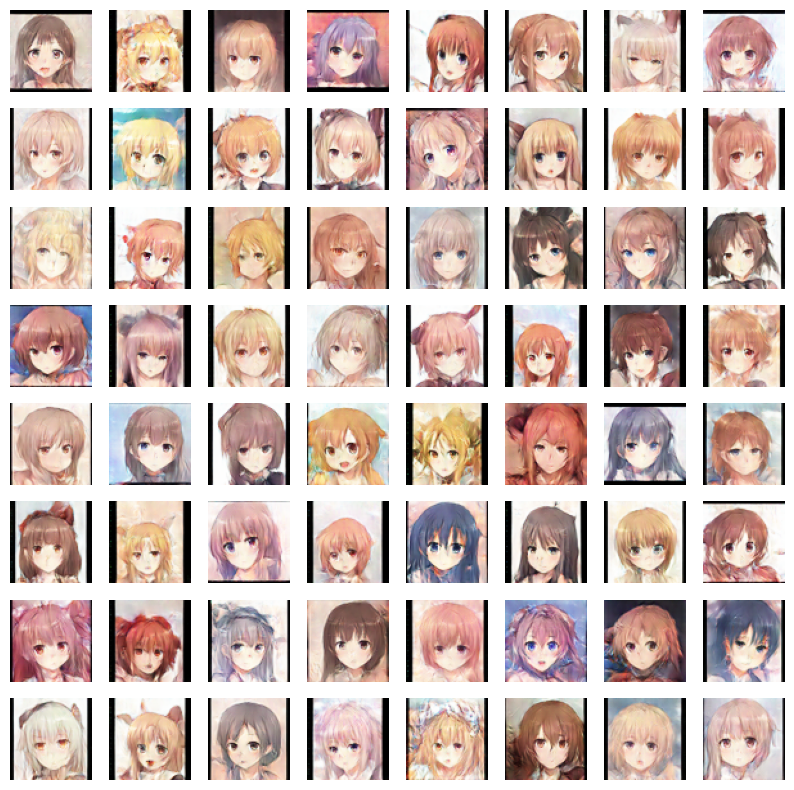

In [4]:
import torch
from GANime.gan import GAN

#initialize new model with random weights
seed_size=128
new_gan_model = GAN(seed_size)
#load model trained for 100 epochs
new_gan_model.gen.load_state_dict(torch.load('GANime/example_models/gen.pt'))
new_gan_model.dis.load_state_dict(torch.load('GANime/example_models/dis.pt'))
#infer generation
generated_images = new_gan_model.generate(num_rows=8,
               num_cols=8,
               plot=True,
               device='cpu',
               return_noise=False
              )

# Checkpoint ท้ายบท

## คำถามชวนคิดเกี่ยวกับบทเรียน

1. คุณคิดว่าปัญหาที่คุณกำลังจะแก้ด้วย ML นั้นปริมาณและคุณภาพของข้อมูลที่ใช้เทรน (Data-Centric AI) หรือประสิทธิภาพของโมเดล (Model-Centric AI) สำคัญกว่ากัน เพราะอะไร

2. คุณคิดว่า open data และ open source มีข้อดี-ข้อเสียอย่างไรต่อ 1) ผู้สร้างผลงาน 2) ผู้นำผลงานไปใช้ 3) ชุมชน 4) สังคมโดยรวม

3. คุณคิดว่าการใช้ข้อมูลสาธารณะจากเว็บไซต์ต่างๆมาเทรนโมเดลมีข้อควรระวังอะไรบ้าง

4. การเทรนโมเดลด้วยข้อมูลที่สร้างขึ้นมาจากอีกโมเดลหนึ่ง ("ข้อมูลปลอม") นั้นมีข้อดี-ข้อเสียอย่างไรบ้าง

## สิ่งที่ควรเตรียมพร้อมสำหรับทำโครงงาน

### ☑️ ทบทวนระบบการให้คะแนนโครงงานให้เรียบร้อย

AI Builders จะออกใบประกาศนียบัตรจบการศึกษาให้กับผู้เข้าร่วมโครงการที่ส่งโครงงานได้คะแนนอย่างน้อย 70 จาก 100 คะแนนตามเกณฑ์ต่อไปนี้เท่านั้น

1. problem statement; เหตุผลในการแก้ปัญหาเชิงธุรกิจ/ชีวิตประจำวันด้วย machine learning - 15 คะแนน
2. metrics and baselines; การให้เหตุผลเชื่อมโยงการแก้ปัญหากับตัวชี้วัดที่เลือก / การวัดผลเทียบกับวิธีแก้ปัญหาในปัจจุบัน - 15 คะแนน

**วันนี้เราจะคิดถึง 2 ข้อนี้เป็นพิเศษ**

**3. data collection and cleaning; การเก็บและทำความสะอาดข้อมูล - 15 คะแนน**


**4. exploratory data analysis; การทำความเข้าใจข้อมูล - 20 คะแนน**


5. modeling, validation and error analysis; การทำโมเดล, ทดสอบโมเดล และวิเคราะห์ข้อผิดพลาดของโมเดล - 20 คะแนน
6. deployment; การนำโมเดลไปใช้แก้ปัญหาจริง - 15 คะแนน

### ☑️ หาข้อมูลมาจากไหนดี

จากแหล่งข้อมูลทั้งหมดที่กล่าวมาในบทเรียนนี้ คุณคิดว่าจะหาชุดข้อมูลจากไหนมาเทรนโมเดล

### ☑️ คุณภาพของข้อมูล Labels และ Inputs

ข้อมูลที่คุณได้มาจากอินเตอร์เน็ตไม่ว่าจะดาวน์โหลดชุดข้อมูลของคนอื่น, scrape เว็บไซต์, ใช้โมเดลคนอื่นสร้างขึ้นมา คุณต้องทำให้แน่ใจว่าคุณภาพมันพร้อมใช้งานทั้ง Labels และ Inputs เช่น ถ้าอยากทำโมเดลแปลภาษาไทย-จีนก็ต้องทำให้แน่ใจว่าคู่ประโยคที่เราหามามันแปลตรงกันจริงๆ เป็นต้น

### ☑️ Train-validation-test Splits สมเหตุสมผลไหม

ใช้สามัญสำนึกและตรรกะในการแบ่งข้อมูลเป็น train, validation, test sets ทำให้มั่นใจว่าไม่มีตัวอย่างเดียวกันหลุดไปใน set อื่น เช่น

* ในการทำ face recognition ไม่ควรมีรูปคนๆเดียวกันในมากกว่า 1 set

* หากทำ time series forecasting เรียงข้อมูลจากเก่าสุดไปใหม่สุดใน `train`, `validation` และ `test` เพื่อไม่ให้โมเดลเห็นข้อมูลจากอนาคต

* หากทำ product recommendation ไม่ควรมีข้อมูลของลูกค้าคนเดียวกันในมากกว่า 1 set เพราะจะทำให้เราเดาว่าเขาเป็นลูกค้าประเภทไหนได้ด้วยข้อมูลที่ไม่ควรเห็น ฯลฯ

ทั้งนี้ขึ้นอยู่กับวิจารณญาณของผู้สร้างโมเดล เรียนรู้เพิ่มเติมเกี่ยวกับการ split ข้อมูลได้จาก เรียนรู้เพิ่มเติมเกี่ยวกับ metric ได้จาก [DS&AI Academy](https://www.youtube.com/playlist?list=PL1kutgc5YvC841TmatsLuj4sDKkwj95Dz)